In [1]:
# imports
import pandas as pd
import numpy as np

Loading in data from

[The Book-Crossing: User review ratings Dataset.](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset)

This includes a table with information on books and a table with information on ratings for books.




In [ ]:
# try getting % rated a certain way for each book, and see if I can use that in the recommender to favour higher rated books

# would be cool to try a toggle of rating as a factor.

In [2]:
RatingsFilepath = '../Data/BX-Book-Ratings.csv'
RatedBooksFilepath = '../Data/BX_Books.csv'

In [3]:
Ratings = pd.read_csv(RatingsFilepath,sep=';', encoding='ISO-8859-1')
Ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [14]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
# checking the rating range of books
Ratings['Book-Rating'].value_counts()
# 0 - 10 range, whole numbers

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [4]:
RatedBooks = pd.read_csv(RatedBooksFilepath,sep=';', encoding='ISO-8859-1')
RatedBooks.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                 2002  Oxford University Press   
1  Richard Bruce Wright                 2001    HarperFlamingo Canada   
2          Carlo D'Este                 1991          HarperPerennial   
3      Gina Bari Kolata                 1999     Farrar Straus Giroux   
4       E. J. W. Barber                 1999   W. W. Norton & Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [13]:
RatedBooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271377 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [32]:
# handling null values
RatedBooks[RatedBooks.isnull().any(axis=1)]

ISBN                                         Book-Title  \
118038  0751352497                           A+ Quiz Masters:01 Earth   
128896  193169656X                                        Tyrant Moon   
129043  1931696993                                    Finders Keepers   
187700  9627982032  The Credit Suisse Guide to Managing Your Perso...   

            Book-Author  Year-Of-Publication                       Publisher  \
118038              NaN                 1999              Dorling Kindersley   
128896  Elaine Corvidae                 2002                             NaN   
129043  Linnea Sinclair                 2001                             NaN   
187700              NaN                 1995  Edinburgh Financial Publishing   

                                              Image-URL-S  \
118038  http://images.amazon.com/images/P/0751352497.0...   
128896  http://images.amazon.com/images/P/193169656X.0...   
129043  http://images.amazon.com/images/P/1931696993.0...   
187700  http://images.amazon.com/images/P/9627982032.0...   

                                              Image-URL-M  \
118038  http://images.amazon.com/images/P/0751352497.0...   
128896  http://images.amazon.com/images/P/193169656X.0...   
129043  http://images.amazon.com/images/P/1931696993.0...   
187700  http://images.amazon.com/images/P/9627982032.0...   

                                              Image-URL-L  
118038  http://images.amazon.com/images/P/0751352497.0...  
128896  http://images.amazon.com/images/P/193169656X.0...  
129043  http://images.amazon.com/images/P/1931696993.0...  
187700  http://images.amazon.com/images/P/9627982032.0...

In [5]:
# dropping nulls
RatedBooks = RatedBooks.dropna()
RatedBooks

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271374  0440400988                         There's a Bat in Bunk Five   
271375  0525447644                            From One to One Hundred   
271376  006008667X  Lily Dale : The True Story of the Town that Ta...   
271377  0192126040                        Republic (World's Classics)   
271378  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author  Year-Of-Publication  \
0         Mark P. O. Morford                 2002   
1       Richard Bruce Wright                 2001   
2               Carlo D'Este                 1991   
3           Gina Bari Kolata                 1999   
4            E. J. W. Barber                 1999   
...                      ...                  ...   
271374        Paula Danziger                 1988   
271375            Teri Sloat                 1991   
271376      Christine Wicker                 2004   
271377                 Plato                 1996   
271378   Christopher  Biffle                 2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                                 W. W. Norton & Company   
...                                                  ...   
271374                   Random House Childrens Pub (Mm)   
271375                                      Dutton Books   
271376                                HarperSanFrancisco   
271377                           Oxford University Press   
271378  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271374  http://images.amazon.com/images/P/0440400988.0...   
271375  http://images.amazon.com/images/P/0525447644.0...   
271376  http://images.amazon.com/images/P/006008667X.0...   
271377  http://images.amazon.com/images/P/0192126040.0...   
271378  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271374  http://images.amazon.com/images/P/0440400988.0...   
271375  http://images.amazon.com/images/P/0525447644.0...   
271376  http://images.amazon.com/images/P/006008667X.0...   
271377  http://images.amazon.com/images/P/0192126040.0...   
271378  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http:

In [39]:
# checking duplicate ISBNs. none
RatedBooks.duplicated(subset='ISBN').value_counts()

False    271375
Name: count, dtype: int64

In [38]:
# checking duplicate title
RatedBooks.duplicated(subset='Book-Title').value_counts()

False    242151
True      29224
Name: count, dtype: int64

In [6]:
# adding a column that combines ISBN and title, so that we can have book title without running into duplicates in that case
RatedBooks['ISBN-and-Title'] = RatedBooks['ISBN'] + ' ' + RatedBooks['Book-Title']
RatedBooks.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                 2002  Oxford University Press   
1  Richard Bruce Wright                 2001    HarperFlamingo Canada   
2          Carlo D'Este                 1991          HarperPerennial   
3      Gina Bari Kolata                 1999     Farrar Straus Giroux   
4       E. J. W. Barber                 1999   W. W. Norton & Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                      ISBN-and-Title  
0                     0195153448 Classical Mythology  
1                            0002005018 Clara Callan  
2                    0060973129 Decision in Normandy  
3  0374157065 Flu: The Story of the Great Influen...  
4                  0393045218 The Mummies of Urumchi

In [7]:
# joining the data
BookData = pd.merge(Ratings, RatedBooks, on='ISBN')
BookData

User-ID        ISBN  Book-Rating  \
0         276725  034545104X            0   
1         276726  0155061224            5   
2         276727  0446520802            0   
3         276729  052165615X            3   
4         276729  0521795028            6   
...          ...         ...          ...   
1031166   276704  0876044011            0   
1031167   276704  1563526298            9   
1031168   276706  0679447156            0   
1031169   276709  0515107662           10   
1031170   276721  0590442449           10   

                                                Book-Title        Book-Author  \
0                                     Flesh Tones: A Novel         M. J. Rose   
1                                         Rites of Passage         Judith Rae   
2                                             The Notebook    Nicholas Sparks   
3                                           Help!: Level 1      Philip Prowse   
4        The Amsterdam Connection : Level 4 (Cambridge ...        Sue Leather   
...                                                    ...                ...   
1031166  Edgar Cayce on the Akashic Records: The Book o...  Kevin J. Todeschi   
1031167  Get Clark Smart : The Ultimate Guide for the S...       Clark Howard   
1031168  Eight Weeks to Optimum Health: A Proven Progra...        Andrew Weil   
1031169   The Sherbrooke Bride (Bride Trilogy (Paperback))  Catherine Coulter   
1031170                                  Fourth Grade Rats     Jerry Spinelli   

         Year-Of-Publication                                      Publisher  \
0                       2002                               Ballantine Books   
1                       2001                                         Heinle   
2                       1996                                   Warner Books   
3                       1999                     Cambridge University Press   
4                       2001                     Cambridge University Press   
...                      ...                                            ...   
1031166                 1998  A.R.E. Press (Association of Research & Enlig   
1031167                 2000                               Longstreet Press   
1031168                 1997                                Alfred A. Knopf   
1031169                 1996                                     Jove Books   
1031170                 1996                                     Scholastic   

                                               Image-URL-S  \
0        http://images.amazon.com/images/P/034545104X.0...   
1        http://images.amazon.com/images/P/0155061224.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
3        http://images.amazon.com/images/P/052165615X.0...   
4        http://images.amazon.com/images/P/0521795028.0...   
...                                                    ...   
1031166  http://images.amazon.com/images/P/0876044011.0...   
1031167  http://images.amazon.com/images/P/1563526298.0...   
1031168  http://images.amazon.com/images/P/0679447156.0...   
1031169  http://images.amazon.com/images/P/0515107662.0...   
1031170  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL-M  \
0        http://images.amazon.com/images/P/034545104X.0...   
1        http://images.amazon.com/images/P/0155061224.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
3        http://images.amazon.com/images/P/052165615X.0...   
4        http://images.amazon.com/images/P/0521795028.0...   
...                                                    ...   
1031166  http://images.amazon.com/images/P/0876044011.0...   
1031167  http://images.amazon.com/images/P/1563526298.0...   
1031168  http://images.amazon.com/images/P/0679447156.0...   
1031169  http://images.amazon.com/images/P/0515107662.0...   
1031170  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL

In [ ]:
# content based filtering

In [8]:
RatedBooks['Book-Author'].str.replace(' ', '')

0            MarkP.O.Morford
1         RichardBruceWright
2                CarloD'Este
3             GinaBariKolata
4               E.J.W.Barber
                 ...        
271374         PaulaDanziger
271375             TeriSloat
271376       ChristineWicker
271377                 Plato
271378     ChristopherBiffle
Name: Book-Author, Length: 271375, dtype: object

In [9]:
# creating a column with the author and publisher. removing the whitespace for author and publisher to avoid pinging similarities on different things (like same first name or two different publishers both having 'company' in their name)
RatedBooks['Author-and-Publisher'] = RatedBooks['Book-Author'].str.replace(' ', '') + ' ' + RatedBooks['Publisher'].str.replace(' ', '')
RatedBooks.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                 2002  Oxford University Press   
1  Richard Bruce Wright                 2001    HarperFlamingo Canada   
2          Carlo D'Este                 1991          HarperPerennial   
3      Gina Bari Kolata                 1999     Farrar Straus Giroux   
4       E. J. W. Barber                 1999   W. W. Norton & Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                      ISBN-and-Title  \
0                     0195153448 Classical Mythology   
1                            0002005018 Clara Callan   
2                    0060973129 Decision in Normandy   
3  0374157065 Flu: The Story of the Great Influen...   
4                  0393045218 The Mummies of Urumchi   

                      Author-and-Publisher  
0    MarkP.O.Morford OxfordUniversityPress  
1  RichardBruceWright HarperFlamingoCanada  
2              CarloD'Este HarperPerennial  
3        GinaBariKolata FarrarStrausGiroux  
4          E.J.W.Barber W.W.Norton&Company

In [10]:
# making the column lowercase for better parsing
RatedBooks['Author-and-Publisher'] = RatedBooks['Author-and-Publisher'].str.lower()
RatedBooks.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                 2002  Oxford University Press   
1  Richard Bruce Wright                 2001    HarperFlamingo Canada   
2          Carlo D'Este                 1991          HarperPerennial   
3      Gina Bari Kolata                 1999     Farrar Straus Giroux   
4       E. J. W. Barber                 1999   W. W. Norton & Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                      ISBN-and-Title  \
0                     0195153448 Classical Mythology   
1                            0002005018 Clara Callan   
2                    0060973129 Decision in Normandy   
3  0374157065 Flu: The Story of the Great Influen...   
4                  0393045218 The Mummies of Urumchi   

                      Author-and-Publisher  
0    markp.o.morford oxforduniversitypress  
1  richardbrucewright harperflamingocanada  
2              carlod'este harperperennial  
3        ginabarikolata farrarstrausgiroux  
4          e.j.w.barber w.w.norton&company

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


In [33]:
# using only books that show up in my >= 350 ratings per book filter

RatedBooksSample = RatedBooks[RatedBooks['ISBN-and-Title'].isin(MinimumRepresentation['ISBN-and-Title'])]
RatedBooksSample

ISBN                  Book-Title       Book-Author  \
18    0440234743               The Testament      John Grisham   
26    0971880107                 Wild Animus      Rich Shapero   
28    0345417623                    Timeline  MICHAEL CRICHTON   
37    0446310786       To Kill a Mockingbird        Harper Lee   
52    0440225701           The Street Lawyer      JOHN GRISHAM   
...          ...                         ...               ...   
4430  0375727345       House of Sand and Fog   Andre Dubus III   
4824  0316601950  The Pilot's Wife : A Novel      Anita Shreve   
5545  0440220602                 The Chamber      John Grisham   
5662  0440241073                 The Summons      John Grisham   
7500  0440222656         The Horse Whisperer    Nicholas Evans   

      Year-Of-Publication                Publisher  \
18                   1999                     Dell   
26                   2004                  Too Far   
28                   2000         Ballantine Books   
37                   1988   Little Brown & Company   
52                   1999                     Dell   
...                   ...                      ...   
4430                 2000            Vintage Books   
4824                 1999           Back Bay Books   
5545                 1995  Dell Publishing Company   
5662                 2002  Dell Publishing Company   
7500                 1996                     Dell   

                                                       Image-URL-S  \
18    http://images.amazon.com/images/P/0440234743.01.THUMBZZZ.jpg   
26    http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg   
28    http://images.amazon.com/images/P/0345417623.01.THUMBZZZ.jpg   
37    http://images.amazon.com/images/P/0446310786.01.THUMBZZZ.jpg   
52    http://images.amazon.com/images/P/0440225701.01.THUMBZZZ.jpg   
...                                                            ...   
4430  http://images.amazon.com/images/P/0375727345.01.THUMBZZZ.jpg   
4824  http://images.amazon.com/images/P/0316601950.01.THUMBZZZ.jpg   
5545  http://images.amazon.com/images/P/0440220602.01.THUMBZZZ.jpg   
5662  http://images.amazon.com/images/P/0440241073.01.THUMBZZZ.jpg   
7500  http://images.amazon.com/images/P/0440222656.01.THUMBZZZ.jpg   

                                                       Image-URL-M  \
18    http://images.amazon.com/images/P/0440234743.01.MZZZZZZZ.jpg   
26    http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg   
28    http://images.amazon.com/images/P/0345417623.01.MZZZZZZZ.jpg   
37    http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg   
52    http://images.amazon.com/images/P/0440225701.01.MZZZZZZZ.jpg   
...                                                            ...   
4430  http://images.amazon.com/images/P/0375727345.01.MZZZZZZZ.jpg   
4824  http://images.amazon.com/images/P/0316601950.01.MZZZZZZZ.jpg   
5545  http://images.amazon.com/images/P/0440220602.01.MZZZZZZZ.jpg   
5662  http://images.amazon.com/images/P/0440241073.01.MZZZZZZZ.jpg   
7500  http://images.amazon.com/images/P/0440222656.01.MZZZZZZZ.jpg   

                                                       Image-URL-L  \
18    http://images.amazon.com/images/P/0440234743.01.LZZZZZZZ.jpg   
26    http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg   
28    http://images.amazon.com/images/P/0345417623.01.LZZZZZZZ.jpg   
37    http://images.amazon.com/images/P/0446310786.01.LZZZZZZZ.jpg   
52    http://images.amazon.com/images/P/0440225701.01.LZZZZZZZ.jpg   
...                                                            ...   
4430  http://images.amazon.com/images/P/0375727345.01.LZZZZZZZ.jpg   
4824  http://images.amazon.com/images/P/0316601950.01.LZZZZZZZ.jpg   
5545  http://images.amazon.com/images/P/0440220602.01.LZZZZZZZ.jpg   
5662  http://images.amazon.com/images/P/0440241073.01.LZZZZZZZ.jpg   
7500  http://images.amazon.com/images/P/0440222656.01.LZZZZZZZ.jpg   

                             ISBN-and-Title    

In [55]:
# getting a sample of the books
RatedBooksSample = RatedBooks.sample(n=30000, random_state=3)
RatedBooksSample

ISBN                                         Book-Title  \
141532  087113859X  Finders Keepers: The Story of a Man Who Found ...   
106780  2253076880                                       Souviens-toi   
71096   0207188378  The Flavors of France: Fabulous Vegetarian Cui...   
188659  0739406388                                           Timeline   
80787   0312966792              Reckless Homicide (Reckless Homicide)   
...            ...                                                ...   
161738  0491034849                        Doctor Who: Illustrated A-Z   
110672  0385336675                             The Enemy (Child, Lee)   
150247  0671013742  Upon A Midnight Clear : A Delightful Collectio...   
31398   0307101657  Baby Mickey's Book of Shapes (First Little Gol...   
248509  156156110X               The littlest dinosaur finds a friend   

                     Book-Author  Year-Of-Publication  \
141532               Mark Bowden                 2002   
106780        Mary Higgins Clark                 1997   
71096                 Jean Conil                 1995   
188659          Michael Crichton                    0   
80787                Ira Genberg                 1998   
...                          ...                  ...   
161738          Lesley Standring                 1985   
110672                 Lee Child                 2004   
150247             Jude Deveraux                 1997   
31398   First Little Golden Book                 1998   
248509           Charyl Friedman                 1992   

                           Publisher  \
141532        Atlantic Monthly Press   
106780                           LGF   
71096             HarperSanFrancisco   
188659               Knopf, Alfred A   
80787             St. Martin's Press   
...                              ...   
161738  Carol Publishing Corporation   
110672               Delacorte Press   
150247                         Atria   
31398   Random House Childrens Books   
248509                     Kidsbooks   

                                              Image-URL-S  \
141532  http://images.amazon.com/images/P/087113859X.0...   
106780  http://images.amazon.com/images/P/2253076880.0...   
71096   http://images.amazon.com/images/P/0207188378.0...   
188659  http://images.amazon.com/images/P/0739406388.0...   
80787   http://images.amazon.com/images/P/0312966792.0...   
...                                                   ...   
161738  http://images.amazon.com/images/P/0491034849.0...   
110672  http://images.amazon.com/images/P/0385336675.0...   
150247  http://images.amazon.com/images/P/0671013742.0...   
31398   http://images.amazon.com/images/P/0307101657.0...   
248509  http://images.amazon.com/images/P/156156110X.0...   

                                              Image-URL-M  \
141532  http://images.amazon.com/images/P/087113859X.0...   
106780  http://images.amazon.com/images/P/2253076880.0...   
71096   http://images.amazon.com/images/P/0207188378.0...   
188659  http://images.amazon.com/images/P/0739406388.0...   
80787   http://images.amazon.com/images/P/0312966792.0...   
...                                                   ...   
161738  http://images.amazon.com/images/P/0491034849.0...   
110672  http://images.amazon.com/images/P/0385336675.0...   
150247  http://images.amazon.com/images/P/0671013742.0...   
31398   http://images.amazon.com/images/P/0307101657.0...   
248509  http://images.amazon.com/images/P/156156110X.0...   

                                              Image-URL-L  \
141532  http://images.amazon.com/images/P/087113859X.0...   
106780  http://images.amazon.com/images/P/2253076880.0...   
71096   http://images.amazon.com/images/P/0207188378.0...   
188659  http://images.amazon.com/images/P/0739406388.0...   
80787   http://images.amazon.com/images/P/0312966792.0...   
...                                                   ...   
161738  http://images.amazon.com/images/P/0491034849.0...   
110672  http://im

In [56]:
# creating the count matrix
WordCount = CountVectorizer()
CountMatrix = WordCount.fit_transform(RatedBooksSample['Author-and-Publisher'])

In [34]:
# for >= 350
WordCount350 = CountVectorizer()
CountMatrix350 = WordCount350.fit_transform(RatedBooksSample['Author-and-Publisher'])

In [57]:
CountMatrix.shape

(30000, 25749)

In [35]:
CountMatrix350.shape

(61, 78)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity


In [58]:
# computing cosine similarity based on the count matrix
CosineSim = cosine_similarity(CountMatrix, CountMatrix)

In [25]:
# computing cosine similarity based on the count matrix for 350
CosineSim = cosine_similarity(CountMatrix350, CountMatrix350)

In [59]:
# resetting index to work with 
RatedBooksSample = RatedBooksSample.reset_index()
Indices = pd.Series(RatedBooksSample.index, index=RatedBooksSample['ISBN-and-Title'])

In [29]:
# resetting index to work with 350
RatedBooksSample350 = RatedBooks350Ratings.reset_index()
Indices = pd.Series(RatedBooks350Ratings.index, index=RatedBooks350Ratings['ISBN-and-Title'])

In [41]:
RatedBooks350Ratings['ISBN-and-Title']

18                   0440234743 The Testament
26                     0971880107 Wild Animus
28                        0345417623 Timeline
37           0446310786 To Kill a Mockingbird
52               0440225701 The Street Lawyer
                        ...                  
4430         0375727345 House of Sand and Fog
4824    0316601950 The Pilot's Wife : A Novel
5545                   0440220602 The Chamber
5662                   0440241073 The Summons
7500           0440222656 The Horse Whisperer
Name: ISBN-and-Title, Length: 61, dtype: object

In [66]:
Indices

ISBN-and-Title
087113859X Finders Keepers: The Story of a Man Who Found $1 Million                                                   0
2253076880 Souviens-toi                                                                                               1
0207188378 The Flavors of France: Fabulous Vegetarian Cuisine for Every Occasion : An Earthly Delight Cookbook        2
0739406388 Timeline                                                                                                   3
0312966792 Reckless Homicide (Reckless Homicide)                                                                      4
                                                                                                                  ...  
0491034849 Doctor Who: Illustrated A-Z                                                                            29995
0385336675 The Enemy (Child, Lee)                                                                                 29996
0671013742 Upon A Midnigh

In [30]:
Indices

ISBN-and-Title
0440234743 The Testament                   18
0971880107 Wild Animus                     26
0345417623 Timeline                        28
0446310786 To Kill a Mockingbird           37
0440225701 The Street Lawyer               52
                                         ... 
0375727345 House of Sand and Fog         4430
0316601950 The Pilot's Wife : A Novel    4824
0440220602 The Chamber                   5545
0440241073 The Summons                   5662
0440222656 The Horse Whisperer           7500
Length: 61, dtype: int64

In [31]:
# using a function to input a combined ISBN and Title and get output of similar books
def BookRecommenderContent(ISBNandTitle, CosineSimilarity=CosineSim):
    # getting the index of the box matching with the input
    BookIndex = Indices[ISBNandTitle]

    # getting the similarity scores of all books compared to that book
    SimScores = list(enumerate(CosineSim[BookIndex]))

    # sorting the books based on the similarity scores
    SimScores = sorted(SimScores, key=lambda x: x[1], reverse=True)

    # getting the scores of the 10 most similar books
    SimScores = SimScores[1:11]

    # getting the book indices
    BookIndices = [score[0] for score in SimScores]

    # returning the top 10 most similar books
    return RatedBooksSample['ISBN-and-Title'].iloc[BookIndices]

## testing to see if I can get the link working as desired

In [46]:
RatedBooksSample = RatedBooks[RatedBooks['ISBN-and-Title'].isin(MinimumRepresentation['ISBN-and-Title'])]
RatedBooksSample

ISBN                  Book-Title       Book-Author  \
18    0440234743               The Testament      John Grisham   
26    0971880107                 Wild Animus      Rich Shapero   
28    0345417623                    Timeline  MICHAEL CRICHTON   
37    0446310786       To Kill a Mockingbird        Harper Lee   
52    0440225701           The Street Lawyer      JOHN GRISHAM   
...          ...                         ...               ...   
4430  0375727345       House of Sand and Fog   Andre Dubus III   
4824  0316601950  The Pilot's Wife : A Novel      Anita Shreve   
5545  0440220602                 The Chamber      John Grisham   
5662  0440241073                 The Summons      John Grisham   
7500  0440222656         The Horse Whisperer    Nicholas Evans   

      Year-Of-Publication                Publisher  \
18                   1999                     Dell   
26                   2004                  Too Far   
28                   2000         Ballantine Books   
37                   1988   Little Brown & Company   
52                   1999                     Dell   
...                   ...                      ...   
4430                 2000            Vintage Books   
4824                 1999           Back Bay Books   
5545                 1995  Dell Publishing Company   
5662                 2002  Dell Publishing Company   
7500                 1996                     Dell   

                                                       Image-URL-S  \
18    http://images.amazon.com/images/P/0440234743.01.THUMBZZZ.jpg   
26    http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg   
28    http://images.amazon.com/images/P/0345417623.01.THUMBZZZ.jpg   
37    http://images.amazon.com/images/P/0446310786.01.THUMBZZZ.jpg   
52    http://images.amazon.com/images/P/0440225701.01.THUMBZZZ.jpg   
...                                                            ...   
4430  http://images.amazon.com/images/P/0375727345.01.THUMBZZZ.jpg   
4824  http://images.amazon.com/images/P/0316601950.01.THUMBZZZ.jpg   
5545  http://images.amazon.com/images/P/0440220602.01.THUMBZZZ.jpg   
5662  http://images.amazon.com/images/P/0440241073.01.THUMBZZZ.jpg   
7500  http://images.amazon.com/images/P/0440222656.01.THUMBZZZ.jpg   

                                                       Image-URL-M  \
18    http://images.amazon.com/images/P/0440234743.01.MZZZZZZZ.jpg   
26    http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg   
28    http://images.amazon.com/images/P/0345417623.01.MZZZZZZZ.jpg   
37    http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg   
52    http://images.amazon.com/images/P/0440225701.01.MZZZZZZZ.jpg   
...                                                            ...   
4430  http://images.amazon.com/images/P/0375727345.01.MZZZZZZZ.jpg   
4824  http://images.amazon.com/images/P/0316601950.01.MZZZZZZZ.jpg   
5545  http://images.amazon.com/images/P/0440220602.01.MZZZZZZZ.jpg   
5662  http://images.amazon.com/images/P/0440241073.01.MZZZZZZZ.jpg   
7500  http://images.amazon.com/images/P/0440222656.01.MZZZZZZZ.jpg   

                                                       Image-URL-L  \
18    http://images.amazon.com/images/P/0440234743.01.LZZZZZZZ.jpg   
26    http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg   
28    http://images.amazon.com/images/P/0345417623.01.LZZZZZZZ.jpg   
37    http://images.amazon.com/images/P/0446310786.01.LZZZZZZZ.jpg   
52    http://images.amazon.com/images/P/0440225701.01.LZZZZZZZ.jpg   
...                                                            ...   
4430  http://images.amazon.com/images/P/0375727345.01.LZZZZZZZ.jpg   
4824  http://images.amazon.com/images/P/0316601950.01.LZZZZZZZ.jpg   
5545  http://images.amazon.com/images/P/0440220602.01.LZZZZZZZ.jpg   
5662  http://images.amazon.com/images/P/0440241073.01.LZZZZZZZ.jpg   
7500  http://images.amazon.com/images/P/0440222656.01.LZZZZZZZ.jpg   

                             ISBN-and-Title    

In [47]:
WordCount350 = CountVectorizer()
CountMatrix350 = WordCount350.fit_transform(RatedBooksSample['Author-and-Publisher'])

In [48]:
CountMatrix350.shape

(61, 78)

In [49]:
# computing cosine similarity based on the count matrix for 350
CosineSim = cosine_similarity(CountMatrix350, CountMatrix350)

In [51]:
Indices = pd.Series(RatedBooks350Ratings.index, index=RatedBooks350Ratings['ISBN-and-Title'])
Indices

ISBN-and-Title
0440234743 The Testament                   18
0971880107 Wild Animus                     26
0345417623 Timeline                        28
0446310786 To Kill a Mockingbird           37
0440225701 The Street Lawyer               52
                                         ... 
0375727345 House of Sand and Fog         4430
0316601950 The Pilot's Wife : A Novel    4824
0440220602 The Chamber                   5545
0440241073 The Summons                   5662
0440222656 The Horse Whisperer           7500
Length: 61, dtype: int64

In [ ]:
BookRecommenderContent('0440234743 The Testament')

2849            0312291639 The Nanny Diaries: A Novel
18                           0440234743 The Testament
26                             0971880107 Wild Animus
28                                0345417623 Timeline
37                   0446310786 To Kill a Mockingbird
52                       0440225701 The Street Lawyer
67                       0804106304 The Joy Luck Club
90                  0316769487 The Catcher in the Rye
107     0786868716 The Five People You Meet in Heaven
118                        0671027360 Angels & Demons
Name: ISBN-and-Title, dtype: object

In [27]:
pd.set_option('display.max_colwidth', None) # Show full column content

In [71]:
BookRecommenderContent('087113859X Finders Keepers: The Story of a Man Who Found $1 Million')

19206                                              0871137836 Killing Pablo: The Hunt for the World's Greatest Outlaw
6402                                                0871138654 The Devil that Danced on the Water: A Daughter's Quest
7110                                                                                                087113327X Eleven
8387                                                                                    0871137755 Rhode Island Blues
13112                                                               0451203933 Black Hawk Down: A Story of Modern War
13730                                             0802140211 Finders Keepers: The Story of a Man Who Found $1 Million
16794                           1903809002 Killing Pablo: The Hunt for the Richest, Most Powerful Criminal in History
17473    0871131625 East Along the Equator: A Journey Up the Congo and into Zaire (Traveler / Atlantic Monthly Press)
18998                                                   

In [ ]:
# based on 350

In [ ]:
# getting recommendations


In [7]:
# getting average rating of book and amount of ratings
RatingAverageCount = pd.DataFrame(BookData.groupby(['ISBN','Book-Title'])['Book-Rating'].mean())
RatingAverageCount['Rating-Count'] = pd.DataFrame(BookData.groupby(['ISBN','Book-Title'])['Book-Rating'].count())
RatingAverageCount

Book-Rating  \
ISBN       Book-Title                                                        
0000913154 The Way Things Work: An Illustrated Encyclopedi...          8.0   
0001010565 Mog's Christmas                                             0.0   
0001046438 Liar                                                        9.0   
0001046713 Twopence to Cross the Mersey                                0.0   
000104687X T.S. Eliot Reading \The Wasteland\" and Other P...          6.0   
...                                                                    ...   
B000234N76 Falling Angels                                              0.0   
B000234NC6 It Must've Been Something I Ate: The Return of ...          0.0   
B00029DGGO Good Wife Strikes Back, The                                 0.0   
B0002JV9PY The Blockade Runners                                        0.0   
B0002K6K8O The Underground City                                        0.0   

                                                               Rating-Count  
ISBN       Book-Title                                                        
0000913154 The Way Things Work: An Illustrated Encyclopedi...             1  
0001010565 Mog's Christmas                                                2  
0001046438 Liar                                                           1  
0001046713 Twopence to Cross the Mersey                                   1  
000104687X T.S. Eliot Reading \The Wasteland\" and Other P...             1  
...                                                                     ...  
B000234N76 Falling Angels                                                 1  
B000234NC6 It Must've Been Something I Ate: The Return of ...             1  
B00029DGGO Good Wife Strikes Back, The                                    1  
B0002JV9PY The Blockade Runners                                           1  
B0002K6K8O The Underground City                                           1  

[270166 rows x 2 columns]

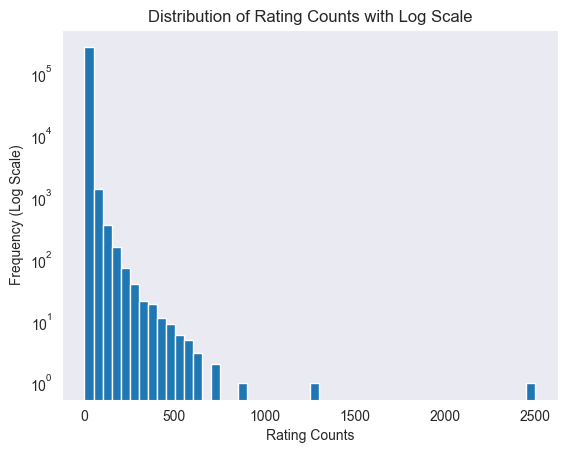

In [45]:
import matplotlib.pyplot as plt

# displaying distribuition of rating counts
plt.hist(RatingAverageCount['Rating-Count'], bins=50)  # Adjust bins as needed
plt.yscale('log')  # setting y-axis to a logarithmic scale
plt.xlabel('Rating Counts')
plt.ylabel('Frequency (Log Scale)')
plt.title('Distribution of Rating Counts with Log Scale')
plt.show()


In [ ]:
# We can see that most of the books have between 1 and 10 ratings

<Axes: >

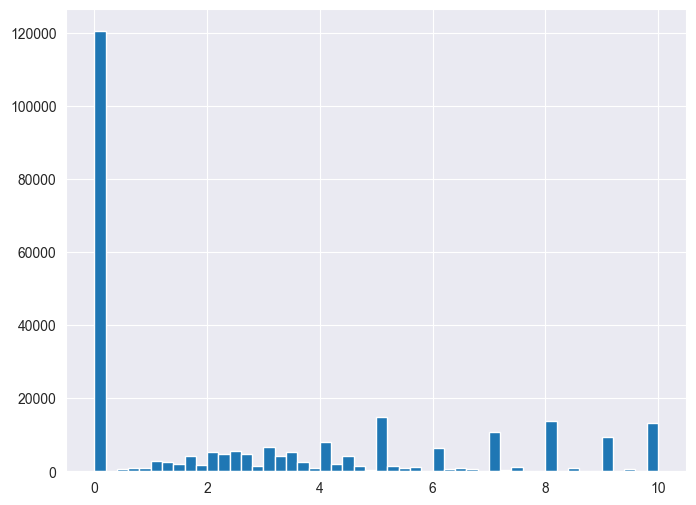

In [24]:
# displaying distribution of ratings
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
RatingAverageCount['Book-Rating'].hist(bins=50)

In [ ]:
# most of the books have an average rating of 0

In [12]:
BookData

User-ID        ISBN  Book-Rating  \
0         276725  034545104X            0   
1         276726  0155061224            5   
2         276727  0446520802            0   
3         276729  052165615X            3   
4         276729  0521795028            6   
...          ...         ...          ...   
1031166   276704  0876044011            0   
1031167   276704  1563526298            9   
1031168   276706  0679447156            0   
1031169   276709  0515107662           10   
1031170   276721  0590442449           10   

                                                Book-Title        Book-Author  \
0                                     Flesh Tones: A Novel         M. J. Rose   
1                                         Rites of Passage         Judith Rae   
2                                             The Notebook    Nicholas Sparks   
3                                           Help!: Level 1      Philip Prowse   
4        The Amsterdam Connection : Level 4 (Cambridge ...        Sue Leather   
...                                                    ...                ...   
1031166  Edgar Cayce on the Akashic Records: The Book o...  Kevin J. Todeschi   
1031167  Get Clark Smart : The Ultimate Guide for the S...       Clark Howard   
1031168  Eight Weeks to Optimum Health: A Proven Progra...        Andrew Weil   
1031169   The Sherbrooke Bride (Bride Trilogy (Paperback))  Catherine Coulter   
1031170                                  Fourth Grade Rats     Jerry Spinelli   

         Year-Of-Publication                                      Publisher  \
0                       2002                               Ballantine Books   
1                       2001                                         Heinle   
2                       1996                                   Warner Books   
3                       1999                     Cambridge University Press   
4                       2001                     Cambridge University Press   
...                      ...                                            ...   
1031166                 1998  A.R.E. Press (Association of Research & Enlig   
1031167                 2000                               Longstreet Press   
1031168                 1997                                Alfred A. Knopf   
1031169                 1996                                     Jove Books   
1031170                 1996                                     Scholastic   

                                               Image-URL-S  \
0        http://images.amazon.com/images/P/034545104X.0...   
1        http://images.amazon.com/images/P/0155061224.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
3        http://images.amazon.com/images/P/052165615X.0...   
4        http://images.amazon.com/images/P/0521795028.0...   
...                                                    ...   
1031166  http://images.amazon.com/images/P/0876044011.0...   
1031167  http://images.amazon.com/images/P/1563526298.0...   
1031168  http://images.amazon.com/images/P/0679447156.0...   
1031169  http://images.amazon.com/images/P/0515107662.0...   
1031170  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL-M  \
0        http://images.amazon.com/images/P/034545104X.0...   
1        http://images.amazon.com/images/P/0155061224.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
3        http://images.amazon.com/images/P/052165615X.0...   
4        http://images.amazon.com/images/P/0521795028.0...   
...                                                    ...   
1031166  http://images.amazon.com/images/P/0876044011.0...   
1031167  http://images.amazon.com/images/P/1563526298.0...   
1031168  http://images.amazon.com/images/P/0679447156.0...   
1031169  http://images.amazon.com/images/P/0515107662.0...   
1031170  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL

In [8]:
BookData.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [ ]:
# trying most popular books; get some most popular books then get a few users

In [52]:
BookData.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'ISBN-and-Title'],
      dtype='object')

In [11]:
# getting ratings per book
RatingsPerBook = BookData['ISBN-and-Title'].value_counts()
RatingsPerBook

ISBN-and-Title
0971880107 Wild Animus                                                      2502
0316666343 The Lovely Bones: A Novel                                        1295
0385504209 The Da Vinci Code                                                 883
0060928336 Divine Secrets of the Ya-Ya Sisterhood: A Novel                   732
0312195516 The Red Tent (Bestselling Backlist)                               723
                                                                            ... 
0916211053 Heroes Unlimited                                                    1
0916211096 The Palladium Rpg Book II: Old Ones (Fantasy Adventure, No 2)       1
0916211150 After the Bomb Role-Playing Game                                    1
0916211169 Teenage Mutant Ninja Turtles Adventures                             1
0806917695 Perplexing Lateral Thinking Puzzles: Scholastic Edition             1
Name: count, Length: 270166, dtype: int64

In [12]:
# changing to a DataFrame for easier data access
RatingsPerBookDF = RatingsPerBook.reset_index()
RatingsPerBookDF.columns = ['ISBN-and-Title','Rating-Count']
RatingsPerBookDF

ISBN-and-Title  Rating-Count
0                                  0971880107 Wild Animus          2502
1                    0316666343 The Lovely Bones: A Novel          1295
2                            0385504209 The Da Vinci Code           883
3       0060928336 Divine Secrets of the Ya-Ya Sisterh...           732
4          0312195516 The Red Tent (Bestselling Backlist)           723
...                                                   ...           ...
270161                        0916211053 Heroes Unlimited             1
270162  0916211096 The Palladium Rpg Book II: Old Ones...             1
270163        0916211150 After the Bomb Role-Playing Game             1
270164  0916211169 Teenage Mutant Ninja Turtles Advent...             1
270165  0806917695 Perplexing Lateral Thinking Puzzles...             1

[270166 rows x 2 columns]

In [13]:
# getting books with 100 or more ratings
MinimumRepresentation = RatingsPerBookDF[RatingsPerBookDF['Rating-Count'] >= 350]
MinimumRepresentation

ISBN-and-Title  Rating-Count
0                              0971880107 Wild Animus          2502
1                0316666343 The Lovely Bones: A Novel          1295
2                        0385504209 The Da Vinci Code           883
3   0060928336 Divine Secrets of the Ya-Ya Sisterh...           732
4      0312195516 The Red Tent (Bestselling Backlist)           723
..                                                ...           ...
56                              0375707972 The Reader           354
57              0312291639 The Nanny Diaries: A Novel           354
58  0439064872 Harry Potter and the Chamber of Sec...           351
59                      0060934417 Bel Canto: A Novel           350
60  0385335482 Confessions of a Shopaholic (Summer...           350

[61 rows x 2 columns]

In [22]:
# applying this to the data
Minimum350Ratings = BookData[BookData['ISBN-and-Title'].isin(MinimumRepresentation['ISBN-and-Title'])]
Minimum350Ratings

User-ID        ISBN  Book-Rating  \
310       276925  0316666343            0   
313       276925  0385504209            8   
335       276925  0804106304            0   
339       276925  0971880107            0   
456       276939  059035342X            0   
...          ...         ...          ...   
1030924   276680  0385504209            8   
1031033   276681  0060930535            9   
1031046   276683  0345337662            0   
1031053   276688  006101351X            0   
1031071   276688  0375706771            0   

                                                Book-Title  \
310                              The Lovely Bones: A Novel   
313                                      The Da Vinci Code   
335                                      The Joy Luck Club   
339                                            Wild Animus   
456      Harry Potter and the Sorcerer's Stone (Harry P...   
...                                                    ...   
1030924                                  The Da Vinci Code   
1031033                      The Poisonwood Bible: A Novel   
1031046                         Interview with the Vampire   
1031053  The Perfect Storm : A True Story of Men Agains...   
1031071                                  Midwives: A Novel   

                Book-Author  Year-Of-Publication               Publisher  \
310            Alice Sebold                 2002           Little, Brown   
313               Dan Brown                 2003               Doubleday   
335                 Amy Tan                 1994    Prentice Hall (K-12)   
339            Rich Shapero                 2004                 Too Far   
456           J. K. Rowling                 1999  Arthur A. Levine Books   
...                     ...                  ...                     ...   
1030924           Dan Brown                 2003               Doubleday   
1031033  Barbara Kingsolver                 1999               Perennial   
1031046           Anne Rice                 1993        Ballantine Books   
1031053    Sebastian Junger                 1998             HarperTorch   
1031071     Chris Bohjalian                 1998                 Vintage   

                                               Image-URL-S  \
310      http://images.amazon.com/images/P/0316666343.0...   
313      http://images.amazon.com/images/P/0385504209.0...   
335      http://images.amazon.com/images/P/0804106304.0...   
339      http://images.amazon.com/images/P/0971880107.0...   
456      http://images.amazon.com/images/P/059035342X.0...   
...                                                    ...   
1030924  http://images.amazon.com/images/P/0385504209.0...   
1031033  http://images.amazon.com/images/P/0060930535.0...   
1031046  http://images.amazon.com/images/P/0345337662.0...   
1031053  http://images.amazon.com/images/P/006101351X.0...   
1031071  http://images.amazon.com/images/P/0375706771.0...   

                                               Image-URL-M  \
310      http://images.amazon.com/images/P/0316666343.0...   
313      http://images.amazon.com/images/P/0385504209.0...   
335      http://images.amazon.com/images/P/0804106304.0...   
339      http://images.amazon.com/images/P/0971880107.0...   
456      http://images.amazon.com/images/P/059035342X.0...   
...                                                    ...   
1030924  http://images.amazon.com/images/P/0385504209.0...   
1031033  http://images.amazon.com/images/P/0060930535.0...   
1031046  http://images.amazon.com/images/P/0345337662.0...   
1031053  http://images.amazon.com/images/P/006101351X.0...   
1031071  http://images.amazon.com/images/P/0375706771.0...   

                                               Image-URL-L  \
310      http://images.amazon.com/images/P/0316666343.0...   
313      http://images.amazon.com/images/P/0385504209.0...   
335      http://images.amazon.com/images/P/0804106304.0...   
339      http://images.amazon.com/images/P/0971880107.0...   
456      h

In [ ]:
# trying some books in this sample


In [31]:
def BookRecommenderCollaborativeMem(ISBNandTitle, DataSample):
	'''
	ISBNandTitle : string of the ISBN and Title
	DataSample : dataframe of the sample of review data.
	
	'''
	# start with the sample data. code that outside of the function and use it in here.
	
	# creating a table showing the ratings of each user in the sample data compared with each book in the sample data
	UserRatingsTable = DataSample.pivot_table(index='User-ID', columns='ISBN-and-Title', values='Book-Rating', aggfunc='mean')

	# getting the ratings for the selected book
	SelectedRatings = UserRatingsTable[ISBNandTitle]
	
	# getting the correlation of the other books with the selected book
	BooksLikeSelected = UserRatingsTable.corrwith(SelectedRatings)
	
	# making a dataframe of these correlations
	CorrelatedBooks = pd.DataFrame(BooksLikeSelected, columns=['Correlation'])
	CorrelatedBooks.dropna(inplace=True)
	# ensuring the book itself doesn't show up as a recommendation
	CorrelatedBooks.drop(index=ISBNandTitle,inplace=True)
	
	# sorting by highest corrrelation and showing the top 10 most related books
	return CorrelatedBooks.sort_values('Correlation',ascending=False).head(10)

In [ ]:
'0971880107 Wild Animus'
'0385504209 The Da Vinci Code'
'0345337662 Interview with the Vampire'

In [ ]:
# comparing with content based made with 350 filter

In [29]:
BookRecommenderCollaborativeMem('0971880107 Wild Animus',Minimum350Ratings)

Correlation
ISBN-and-Title                                                 
0375707972 The Reader                                  0.438078
0375706771 Midwives: A Novel                           0.401975
0440226430 Summer Sisters                              0.284547
0439064872 Harry Potter and the Chamber of Secr...     0.274459
044023722X A Painted House                             0.258960
0440225701 The Street Lawyer                           0.232712
0446672211 Where the Heart Is (Oprah's Book Clu...     0.218464
0312291639 The Nanny Diaries: A Novel                  0.214133
0743418174 Good in Bed                                 0.205465
0345361792 A Prayer for Owen Meany                     0.199031

In [37]:
BookRecommenderContent('0971880107 Wild Animus')

1105        0060928336 Divine Secrets of the Ya-Ya Sisterhood: A Novel
1373                          0060930535 The Poisonwood Bible: A Novel
1485                                     0060934417 Bel Canto: A Novel
3329    0060502258 The Divine Secrets of the Ya-Ya Sisterhood: A Novel
18                                            0440234743 The Testament
26                                              0971880107 Wild Animus
28                                                 0345417623 Timeline
37                                    0446310786 To Kill a Mockingbird
52                                        0440225701 The Street Lawyer
67                                        0804106304 The Joy Luck Club
Name: ISBN-and-Title, dtype: object

In [30]:
BookRecommenderCollaborativeMem('0385504209 The Da Vinci Code',Minimum350Ratings)

Correlation
ISBN-and-Title                                                 
044022165X The Rainmaker                               0.424247
044651652X The Bridges of Madison County               0.414719
0439064872 Harry Potter and the Chamber of Secr...     0.352995
0312278586 The Nanny Diaries: A Novel                  0.336292
006101351X The Perfect Storm : A True Story of ...     0.330858
0671021001 She's Come Undone (Oprah's Book Club)       0.316030
0440222656 The Horse Whisperer                         0.314737
0743418174 Good in Bed                                 0.297452
0375727345 House of Sand and Fog                       0.273593
0345417623 Timeline                                    0.267472

In [54]:
BookRecommenderContent('0385504209 The Da Vinci Code')

IndexError: index 748 is out of bounds for axis 0 with size 61

In [32]:
BookRecommenderCollaborativeMem('0345337662 Interview with the Vampire',Minimum350Ratings)

Correlation
ISBN-and-Title                                                 
044023722X A Painted House                             0.491705
0440236673 The Brethren                                0.471230
0385484518 Tuesdays with Morrie: An Old Man, a ...     0.458196
0060930535 The Poisonwood Bible: A Novel               0.447587
0440241073 The Summons                                 0.410538
0440221471 The Runaway Jury                            0.408842
0446672211 Where the Heart Is (Oprah's Book Clu...     0.408083
006101351X The Perfect Storm : A True Story of ...     0.399422
0316769487 The Catcher in the Rye                      0.320858
0446606812 Message in a Bottle                         0.318370

In [58]:
RatedBooksSample350.columns

Index(['index', 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L',
       'ISBN-and-Title', 'Author-and-Publisher'],
      dtype='object')

In [55]:
BookRecommenderContent('0345337662 Interview with the Vampire')

IndexError: index 2526 is out of bounds for axis 0 with size 61

In [ ]:
# having a minimum number of ratings per book

In [ ]:
# make sure it's a small enough dataset

In [ ]:
# create the table

In [ ]:

Rating0001382381 = TopBookUsersRating['0001382381']
Rating0001382381.head()


BooksLike0001382381 = TopBookUsersRating.corrwith(Rating0001382381)

Corr0001382381 = pd.DataFrame(BooksLike0001382381, columns=['Correlation'])
Corr0001382381.dropna(inplace=True)
Corr0001382381.head()

In [10]:
# getting the book with the most ratings
MostRatedBook = RatingsPerBook.head(1)
MostRatedBook

# changing to a DataFrame for easier data access
MostRatedBookDF = MostRatedBook.reset_index()
MostRatedBookDF.columns = ['ISBN','Rating-Count']
MostRatedBookDF

ISBN  Rating-Count
0  0971880107          2502

In [ ]:
# Filter by checking if each ISBN in BookData is also in RatingCounts
filtered_book_data = BookData[BookData['ISBN'].isin(RatingCounts['ISBN'])]


User-ID  ISBN   Book-Rating  Book-Title  Book-Author  Year-Of-Publication  Publisher  Image-URL-S  Image-URL-M  Image-URL-L
False    False  False        False       False        False                False      False        False        False          1031171
Name: count, dtype: int64

In [33]:
# getting only ratings of the most popular book
FilteredRatingsTopBook = BookData[BookData['ISBN'].isin(MostRatedBookDF['ISBN'])]
FilteredRatingsTopBook

User-ID        ISBN  Book-Rating   Book-Title   Book-Author  \
339       276925  0971880107            0  Wild Animus  Rich Shapero   
457       276939  0971880107            0  Wild Animus  Rich Shapero   
477       276954  0971880107            0  Wild Animus  Rich Shapero   
613       277042  0971880107            2  Wild Animus  Rich Shapero   
740       277157  0971880107            0  Wild Animus  Rich Shapero   
...          ...         ...          ...          ...           ...   
1027801   275793  0971880107            0  Wild Animus  Rich Shapero   
1029719   276113  0971880107            7  Wild Animus  Rich Shapero   
1029747   276147  0971880107            0  Wild Animus  Rich Shapero   
1030378   276487  0971880107            0  Wild Animus  Rich Shapero   
1030735   276641  0971880107            0  Wild Animus  Rich Shapero   

         Year-Of-Publication Publisher  \
339                     2004   Too Far   
457                     2004   Too Far   
477                     2004   Too Far   
613                     2004   Too Far   
740                     2004   Too Far   
...                      ...       ...   
1027801                 2004   Too Far   
1029719                 2004   Too Far   
1029747                 2004   Too Far   
1030378                 2004   Too Far   
1030735                 2004   Too Far   

                                               Image-URL-S  \
339      http://images.amazon.com/images/P/0971880107.0...   
457      http://images.amazon.com/images/P/0971880107.0...   
477      http://images.amazon.com/images/P/0971880107.0...   
613      http://images.amazon.com/images/P/0971880107.0...   
740      http://images.amazon.com/images/P/0971880107.0...   
...                                                    ...   
1027801  http://images.amazon.com/images/P/0971880107.0...   
1029719  http://images.amazon.com/images/P/0971880107.0...   
1029747  http://images.amazon.com/images/P/0971880107.0...   
1030378  http://images.amazon.com/images/P/0971880107.0...   
1030735  http://images.amazon.com/images/P/0971880107.0...   

                                               Image-URL-M  \
339      http://images.amazon.com/images/P/0971880107.0...   
457      http://images.amazon.com/images/P/0971880107.0...   
477      http://images.amazon.com/images/P/0971880107.0...   
613      http://images.amazon.com/images/P/0971880107.0...   
740      http://images.amazon.com/images/P/0971880107.0...   
...                                                    ...   
1027801  http://images.amazon.com/images/P/0971880107.0...   
1029719  http://images.amazon.com/images/P/0971880107.0...   
1029747  http://images.amazon.com/images/P/0971880107.0...   
1030378  http://images.amazon.com/images/P/0971880107.0...   
1030735  http://images.amazon.com/images/P/0971880107.0...   

                                               Image-URL-L  
339      http://images.amazon.com/images/P/0971880107.0...  
457      http://images.amazon.com/images/P/0971880107.0...  
477      http://images.amazon.com/images/P/0971880107.0...  
613      http://images.amazon.com/images/P/0971880107.0...  
740      http://images.amazon.com/images/P/0971880107.0...  
...                                                    ...  
1027801  http://images.amazon.com/images/P/0971880107.0...  
1029719  http://images.amazon.com/images/P/0971880107.0...  
1029747  http://images.amazon.com/images/P/0971880107.0...  
1030378  http://images.amazon.com/images/P/0971880107.0...  
1030735  http://images.amazon.com/images/P/0971880107.0...  

[2502 rows x 10 columns]

In [34]:
# getting all the ratings of every user who rated that book
FilteredRatingsTopBookUsers = BookData[BookData['User-ID'].isin(FilteredRatingsTopBook['User-ID'])]
FilteredRatingsTopBookUsers

User-ID        ISBN  Book-Rating  \
298       276925  002542730X           10   
299       276925  0060520507            0   
300       276925  0060930934            0   
301       276925  0060951303            0   
302       276925  0140154078            6   
...          ...         ...          ...   
1030738   276641  1558219730            0   
1030739   276641  1572703164            8   
1030740   276641  1573223557            8   
1030741   276641  1573225517            0   
1030742   276641  1841952516            6   

                                                Book-Title        Book-Author  \
298      Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
299          Sushi for Beginners : A Novel (Keyes, Marian)       Marian Keyes   
300              Wasted : A Memoir of Anorexia and Bulimia   Marya Hornbacher   
301                              La casa de los espÃ­ritus     Isabel Allende   
302                                    The Music of Chance        Paul Auster   
...                                                    ...                ...   
1030738  We Die Alone: A WWII Epic of Escape and Endurance      David Howarth   
1030739     The Sittaford Mystery (Mystery Masters Series)    Agatha Christie   
1030740       I Wish Someone Were Waiting for Me Somewhere       Anna Gavalda   
1030741                                      High Fidelity        Nick Hornby   
1030742                                      NaÃ¯ve. Super         Erlend Loe   

         Year-Of-Publication              Publisher  \
298                     1994  John Wiley & Sons Inc   
299                     2003         William Morrow   
300                     1999              Perennial   
301                     1995                   Rayo   
302                     1993          Penguin Books   
...                      ...                    ...   
1030738                 1999        The Lyons Press   
1030739                 2003        Mystery Masters   
1030740                 2003        Riverhead Books   
1030741                 1996        Riverhead Books   
1030742                 2003        Canongate Books   

                                               Image-URL-S  \
298      http://images.amazon.com/images/P/002542730X.0...   
299      http://images.amazon.com/images/P/0060520507.0...   
300      http://images.amazon.com/images/P/0060930934.0...   
301      http://images.amazon.com/images/P/0060951303.0...   
302      http://images.amazon.com/images/P/0140154078.0...   
...                                                    ...   
1030738  http://images.amazon.com/images/P/1558219730.0...   
1030739  http://images.amazon.com/images/P/1572703164.0...   
1030740  http://images.amazon.com/images/P/1573223557.0...   
1030741  http://images.amazon.com/images/P/1573225517.0...   
1030742  http://images.amazon.com/images/P/1841952516.0...   

                                               Image-URL-M  \
298      http://images.amazon.com/images/P/002542730X.0...   
299      http://images.amazon.com/images/P/0060520507.0...   
300      http://images.amazon.com/images/P/0060930934.0...   
301      http://images.amazon.com/images/P/0060951303.0...   
302      http://images.amazon.com/images/P/0140154078.0...   
...                                                    ...   
1030738  http://images.amazon.com/images/P/1558219730.0...   
1030739  http://images.amazon.com/images/P/1572703164.0...   
1030740  http://images.amazon.com/images/P/1573223557.0...   
1030741  http://images.amazon.com/images/P/1573225517.0...   
1030742  http://images.amazon.com/images/P/1841952516.0...   

                                               Image-URL-L  
298      http://images.amazon.com/images/P/002542730X.0...  
299      http://images.amazon.com/images/P/0060520507.0...  
300      http://images.amazon.com/images/P/0060930934.0...  
301      http://images.amazon.com/images/P/0060951303.0...  
302      http://images.amazon.com/image

In [35]:
# sampling from this selection
TopBookUsersSample = FilteredRatingsTopBookUsers.sample(n=30000, random_state=3)
TopBookUsersSample

User-ID        ISBN  Book-Rating  \
150276     36836  0385127723            0   
707500    190925  0515127833            0   
428432    114414  0345279751            0   
644148    174304  0064400808            0   
907416    242742  1568659083            0   
...          ...         ...          ...   
1023218   274301  0515057266            0   
870250    234623  0590402293            0   
805178    217740  0452282152            8   
286393     76352  1558747060            9   
895011    239594  0553268074            7   

                                                Book-Title  \
150276                           Notes on Love and Courage   
707500                                         River's End   
428432                  The Complete Guide to Middle-Earth   
644148   On the Way Home: The Diary of a Trip from Sout...   
907416             Secrets of the Heart Mail Order Bride 1   
...                                                    ...   
1023218                                       The Funhouse   
870250                         Koala (Animals in the Wild)   
805178                           Girl with a Pearl Earring   
286393   Chicken Soup for the Single's Soul - 101 Stori...   
895011                                          Beet Queen   

                  Book-Author  Year-Of-Publication              Publisher  \
150276           Hugh Prather                 1993      Main Street Books   
707500           Nora Roberts                 2003             Jove Books   
428432                 Foster                 1979              Not Avail   
644148   Laura Ingalls Wilder                 1976           HarperTrophy   
907416                Al Lacy                    0  Bantam Doubleday Dell   
...                       ...                  ...                    ...   
1023218             Owen West                 1981             Jove Books   
870250       Vincent Serventy                 1987             Scholastic   
805178        Tracy Chevalier                 2001            Plume Books   
286393          Jack Canfield                 1999  Health Communications   
895011         Louise Erdrich                 1987  Bantam Doubleday Dell   

                                               Image-URL-S  \
150276   http://images.amazon.com/images/P/0385127723.0...   
707500   http://images.amazon.com/images/P/0515127833.0...   
428432   http://images.amazon.com/images/P/0345279751.0...   
644148   http://images.amazon.com/images/P/0064400808.0...   
907416   http://images.amazon.com/images/P/1568659083.0...   
...                                                    ...   
1023218  http://images.amazon.com/images/P/0515057266.0...   
870250   http://images.amazon.com/images/P/0590402293.0...   
805178   http://images.amazon.com/images/P/0452282152.0...   
286393   http://images.amazon.com/images/P/1558747060.0...   
895011   http://images.amazon.com/images/P/0553268074.0...   

                                               Image-URL-M  \
150276   http://images.amazon.com/images/P/0385127723.0...   
707500   http://images.amazon.com/images/P/0515127833.0...   
428432   http://images.amazon.com/images/P/0345279751.0...   
644148   http://images.amazon.com/images/P/0064400808.0...   
907416   http://images.amazon.com/images/P/1568659083.0...   
...                                                    ...   
1023218  http://images.amazon.com/images/P/0515057266.0...   
870250   http://images.amazon.com/images/P/0590402293.0...   
805178   http://images.amazon.com/images/P/0452282152.0...   
286393   http://images.amazon.com/images/P/1558747060.0...   
895011   http://images.amazon.com/images/P/0553268074.0...   

                                               Image-URL-L  
150276   http://images.amazon.com/images/P/0385127723.0...  
707500   http://images.amazon.com/images/P/0515127833.0...  
428432   http://images.amazon.com/images/P/0345279751.0...  
644148   http://images.amazon.com/images/P/0064400808.0...  
907

In [36]:
# creating a table showing the ratings (top book)
TopBookUsersRating = TopBookUsersSample.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating', aggfunc='mean')
TopBookUsersRating

ISBN     0001382381  0001711253  0002005018  0002177803  0002190206  \
User-ID                                                               
242             NaN         NaN         NaN         NaN         NaN   
487             NaN         NaN         NaN         NaN         NaN   
626             NaN         NaN         NaN         NaN         NaN   
901             NaN         NaN         NaN         NaN         NaN   
1025            NaN         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
277157          NaN         NaN         NaN         NaN         NaN   
277378          NaN         NaN         NaN         NaN         NaN   
277427          NaN         NaN         NaN         NaN         NaN   
277478          NaN         NaN         NaN         NaN         NaN   
278137          NaN         NaN         NaN         NaN         NaN   

ISBN     000224408X  0002250810  0002255855  0002550555  0002554119  ...  \
User-ID                                                              ...   
242             NaN         NaN         NaN         NaN         NaN  ...   
487             NaN         NaN         NaN         NaN         NaN  ...   
626             NaN         NaN         NaN         NaN         NaN  ...   
901             NaN         NaN         NaN         NaN         NaN  ...   
1025            NaN         NaN         NaN         NaN         NaN  ...   
...             ...         ...         ...         ...         ...  ...   
277157          NaN         NaN         NaN         NaN         NaN  ...   
277378          NaN         NaN         NaN         NaN         NaN  ...   
277427          NaN         NaN         NaN         NaN         NaN  ...   
277478          NaN         NaN         NaN         NaN         NaN  ...   
278137          NaN         NaN         NaN         NaN         NaN  ...   

ISBN     9997519086  B00005U7YK  B00008WFXL  B000092Q0A  B00009APKU  \
User-ID                                                               
242             NaN         NaN         NaN         NaN         NaN   
487             NaN         NaN         NaN         NaN         NaN   
626             NaN         NaN         NaN         NaN         NaN   
901             NaN         NaN         NaN         NaN         NaN   
1025            NaN         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
277157          NaN         NaN         NaN         NaN         NaN   
277378          NaN         NaN         NaN         NaN         NaN   
277427          NaN         NaN         NaN         NaN         NaN   
277478          NaN         NaN         NaN         NaN         NaN   
278137          NaN         NaN         NaN         NaN         NaN   

ISBN     B00009EF82  B0000C37EK  B0000VZEJQ  B00013AX6W  B0001GDNCK  
User-ID                                                              
242             NaN         NaN         NaN         NaN         NaN  
487             NaN         NaN         NaN         NaN         NaN  
626             NaN         NaN         NaN         NaN         NaN  
901             NaN         NaN         NaN         NaN         NaN  
1025            NaN         NaN         NaN         NaN         NaN  
...             ...         ...         ...         ...         ...  
277157          NaN         NaN         NaN         NaN         NaN  
277378          NaN         NaN         NaN         NaN         NaN  
277427          NaN         NaN         NaN         NaN         NaN  
277478          NaN         NaN         NaN         NaN         NaN  
278137          NaN         NaN         NaN         NaN         NaN  

[1575 rows x 23001 columns]

In [44]:
BookData

User-ID        ISBN  Book-Rating  \
0         276725  034545104X            0   
1         276726  0155061224            5   
2         276727  0446520802            0   
3         276729  052165615X            3   
4         276729  0521795028            6   
...          ...         ...          ...   
1031166   276704  0876044011            0   
1031167   276704  1563526298            9   
1031168   276706  0679447156            0   
1031169   276709  0515107662           10   
1031170   276721  0590442449           10   

                                                Book-Title        Book-Author  \
0                                     Flesh Tones: A Novel         M. J. Rose   
1                                         Rites of Passage         Judith Rae   
2                                             The Notebook    Nicholas Sparks   
3                                           Help!: Level 1      Philip Prowse   
4        The Amsterdam Connection : Level 4 (Cambridge ...        Sue Leather   
...                                                    ...                ...   
1031166  Edgar Cayce on the Akashic Records: The Book o...  Kevin J. Todeschi   
1031167  Get Clark Smart : The Ultimate Guide for the S...       Clark Howard   
1031168  Eight Weeks to Optimum Health: A Proven Progra...        Andrew Weil   
1031169   The Sherbrooke Bride (Bride Trilogy (Paperback))  Catherine Coulter   
1031170                                  Fourth Grade Rats     Jerry Spinelli   

         Year-Of-Publication                                      Publisher  \
0                       2002                               Ballantine Books   
1                       2001                                         Heinle   
2                       1996                                   Warner Books   
3                       1999                     Cambridge University Press   
4                       2001                     Cambridge University Press   
...                      ...                                            ...   
1031166                 1998  A.R.E. Press (Association of Research & Enlig   
1031167                 2000                               Longstreet Press   
1031168                 1997                                Alfred A. Knopf   
1031169                 1996                                     Jove Books   
1031170                 1996                                     Scholastic   

                                               Image-URL-S  \
0        http://images.amazon.com/images/P/034545104X.0...   
1        http://images.amazon.com/images/P/0155061224.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
3        http://images.amazon.com/images/P/052165615X.0...   
4        http://images.amazon.com/images/P/0521795028.0...   
...                                                    ...   
1031166  http://images.amazon.com/images/P/0876044011.0...   
1031167  http://images.amazon.com/images/P/1563526298.0...   
1031168  http://images.amazon.com/images/P/0679447156.0...   
1031169  http://images.amazon.com/images/P/0515107662.0...   
1031170  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL-M  \
0        http://images.amazon.com/images/P/034545104X.0...   
1        http://images.amazon.com/images/P/0155061224.0...   
2        http://images.amazon.com/images/P/0446520802.0...   
3        http://images.amazon.com/images/P/052165615X.0...   
4        http://images.amazon.com/images/P/0521795028.0...   
...                                                    ...   
1031166  http://images.amazon.com/images/P/0876044011.0...   
1031167  http://images.amazon.com/images/P/1563526298.0...   
1031168  http://images.amazon.com/images/P/0679447156.0...   
1031169  http://images.amazon.com/images/P/0515107662.0...   
1031170  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL

In [ ]:

Rating0001382381 = TopBookUsersRating['0001382381']
Rating0001382381.head()

User-ID
242    NaN
487    NaN
626    NaN
901    NaN
1025   NaN
Name: 0001382381, dtype: float64

In [38]:

BooksLike0001382381 = TopBookUsersRating.corrwith(Rating0001382381)

Corr0001382381 = pd.DataFrame(BooksLike0001382381, columns=['Correlation'])
Corr0001382381.dropna(inplace=True)
Corr0001382381.head()



c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Empty DataFrame
Columns: [Correlation]
Index: []

In [ ]:
# sampling from users with the most ratings to have variety in books


In [27]:
# counting ratings per user
RatingsPerUser = BookData['User-ID'].value_counts()
RatingsPerUser

User-ID
11676     11144
198711     6456
153662     5814
98391      5777
35859      5646
          ...  
116792        1
116798        1
116801        1
116810        1
276721        1
Name: count, Length: 92107, dtype: int64

In [28]:
# getting the top 5 users with the most ratings
Top5UsersSeries = RatingsPerUser.head(5)

# changing to a DataFrame for easier data access
Top5UsersDF = Top5UsersSeries.reset_index()
Top5UsersDF.columns = ['User-ID','Rating-Count']
Top5UsersDF

User-ID  Rating-Count
0    11676         11144
1   198711          6456
2   153662          5814
3    98391          5777
4    35859          5646

In [29]:
# getting only ratings from these 5 users
Top5UsersData = BookData[BookData['User-ID'].isin(Top5UsersDF['User-ID'])]
Top5UsersData.head()

User-ID        ISBN  Book-Rating  \
39820    11676  0001837397            0   
39821    11676  0001841572            0   
39822    11676  0001848445            0   
39823    11676  0001900277            0   
39824    11676  0001941941            0   

                                                 Book-Title    Book-Author  \
39820                            Autumn Story Brambly Hedge   Jill Barklem   
39821                                             Red Shift    Alan Garner   
39822                                   THE COAL HOUSE T/PB  Andrew Taylor   
39823                     Glue (First Facts - First Skills)  Harriet Hains   
39824  Little Grey Rabbit's Christmas (Collins Colour Cubs)  Alison Uttley   

       Year-Of-Publication                    Publisher  \
39820                    0  William Collins Sons Co Ltd   
39821                 1973                      Collins   
39822                 1986     HarperCollins Publishers   
39823                 1989     HarperCollins Publishers   
39824                 1978     HarperCollins Publishers   

                                                        Image-URL-S  \
39820  http://images.amazon.com/images/P/0001837397.01.THUMBZZZ.jpg   
39821  http://images.amazon.com/images/P/0001841572.01.THUMBZZZ.jpg   
39822  http://images.amazon.com/images/P/0001848445.01.THUMBZZZ.jpg   
39823  http://images.amazon.com/images/P/0001900277.01.THUMBZZZ.jpg   
39824  http://images.amazon.com/images/P/0001941941.01.THUMBZZZ.jpg   

                                                        Image-URL-M  \
39820  http://images.amazon.com/images/P/0001837397.01.MZZZZZZZ.jpg   
39821  http://images.amazon.com/images/P/0001841572.01.MZZZZZZZ.jpg   
39822  http://images.amazon.com/images/P/0001848445.01.MZZZZZZZ.jpg   
39823  http://images.amazon.com/images/P/0001900277.01.MZZZZZZZ.jpg   
39824  http://images.amazon.com/images/P/0001941941.01.MZZZZZZZ.jpg   

                                                        Image-URL-L  \
39820  http://images.amazon.com/images/P/0001837397.01.LZZZZZZZ.jpg   
39821  http://images.amazon.com/images/P/0001841572.01.LZZZZZZZ.jpg   
39822  http://images.amazon.com/images/P/0001848445.01.LZZZZZZZ.jpg   
39823  http://images.amazon.com/images/P/0001900277.01.LZZZZZZZ.jpg   
39824  http://images.amazon.com/images/P/0001941941.01.LZZZZZZZ.jpg   

                                                        ISBN-and-Title  
39820                            0001837397 Autumn Story Brambly Hedge  
39821                                             0001841572 Red Shift  
39822                                   0001848445 THE COAL HOUSE T/PB  
39823                     0001900277 Glue (First Facts - First Skills)  
39824  0001941941 Little Grey Rabbit's Christmas (Collins Colour Cubs)

In [30]:
# sampling from these users
Top5Sample = Top5UsersData.sample(n=30000, random_state=3)
Top5Sample

User-ID        ISBN  Book-Rating  \
139589    35859  0060522577            0   
367483    98391  0843949732            8   
46597     11676  0679402470            5   
144913    35859  1557735255            0   
365762    98391  0505525232           10   
...         ...         ...          ...   
734472   198711  0671021842            0   
567314   153662  0373194161            0   
570692   153662  0743423569            0   
50300     11676  3453864824            0   
48595     11676  0895267160            0   

                                                               Book-Title  \
139589  The Death of an Irish Consul (Peter McGarr Mysteries (Paperback))   
367483                                                       Wanton Angel   
46597                                                Millroy the Magician   
144913                                                    The Last Resort   
365762                                                         Hot Number   
...                                                                   ...   
734472                                                 FORBIDDEN RESEARCH   
567314             Plain Jane Marries The Boss (Silhouette Romance, 1416)   
570692                                                         Not Guilty   
50300                                                    Unter der Decke.   
48595                                          Ambrose Bierce's Civil War   

               Book-Author  Year-Of-Publication           Publisher  \
139589    Bartholomew Gill                 2002                Avon   
367483         Shirl Henke                 2002       Leisure Books   
46597         Paul Theroux                 1994    Random House Inc   
144913  Jacqueline Girdner                 1991     Diamond/Charter   
365762     Sheridon Smythe                 2003          Love Spell   
...                    ...                  ...                 ...   
734472        Howard Simon                 1998              Pocket   
567314  Elizabeth Harbison                 1999          Silhouette   
570692  Patricia MacDonald                 2003              Pocket   
50300         Marian Keyes                 2003               Heyne   
48595       Ambrose Bierce                 1996  Regnery Publishing   

                                                         Image-URL-S  \
139589  http://images.amazon.com/images/P/0060522577.01.THUMBZZZ.jpg   
367483  http://images.amazon.com/images/P/0843949732.01.THUMBZZZ.jpg   
46597   http://images.amazon.com/images/P/0679402470.01.THUMBZZZ.jpg   
144913  http://images.amazon.com/images/P/1557735255.01.THUMBZZZ.jpg   
365762  http://images.amazon.com/images/P/0505525232.01.THUMBZZZ.jpg   
...                                                              ...   
734472  http://images.amazon.com/images/P/0671021842.01.THUMBZZZ.jpg   
567314  http://images.amazon.com/images/P/0373194161.01.THUMBZZZ.jpg   
570692  http://images.amazon.com/images/P/0743423569.01.THUMBZZZ.jpg   
50300   http://images.amazon.com/images/P/3453864824.01.THUMBZZZ.jpg   
48595   http://images.amazon.com/images/P/0895267160.01.THUMBZZZ.jpg   

                                                         Image-URL-M  \
139589  http://images.amazon.com/images/P/0060522577.01.MZZZZZZZ.jpg   
367483  http://images.amazon.com/images/P/0843949732.01.MZZZZZZZ.jpg   
46597   http://images.amazon.com/images/P/0679402470.01.MZZZZZZZ.jpg   
144913  http://images.amazon.com/images/P/1557735255.01.MZZZZZZZ.jpg   
365762  http://images.amazon.com/images/P/0505525232.01.MZZZZZZZ.jpg   
...                                                              ...   
734472  http://images.amazon.com/images/P/0671021842.01.MZZZZZZZ.jpg   
567314  http://images.amazon.com/images/P/0373194161.01.MZZZZZZZ.jpg   
570692  http://images.amazon.com/images/P/0743423569.01.MZZZZZZZ.jpg   
50300   http://images.amazon.com/images/P/3453864824.01.MZZZZZZZ.jpg   
48595   http://images.amazon.com/images/P/08

In [48]:
Top5Sample['ISBN-and-Title'].value_counts()

ISBN-and-Title
1551668378 Halfway To Heaven                                             5
0451210727 Murder of a Barbie and Ken (National Bestselling Series)      4
1579730175 Flik the Inventor                                             4
0425147622 The Body Farm                                                 4
0440208459 Burn Marks (V.I. Warshawski Novels (Paperback))               4
                                                                        ..
0373223064 Ladykiller (Harlequin Intrigue, No 22306)                     1
0449200531 Twice Shy                                                     1
0385316895 Legacy of Silence                                             1
0394857046 The Nutcracker ([My little library of Christmas classics])    1
0895267160 Ambrose Bierce's Civil War                                    1
Name: count, Length: 26651, dtype: int64

In [49]:
BookRecommenderCollaborativeMem('1551668378 Halfway To Heaven',Top5Sample)

c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation
ISBN-and-Title                                                                                       
0446611158 Slow Hands                                                                             1.0
0590407600 Magic School Bus: Inside the Earth (Magic School Bus (Paperback))                      1.0
0505525305 A Girl's Guide to Vampires                                                             1.0
051508901X The Gamble                                                                             1.0
0671001132 DEAD BY SUNSET : DEAD BY SUNSET                                                        1.0
0670899976 Civil Blood: A Civil War Mystery (Civil War Mysteries)                                 1.0
0670894699 The Florabama Ladies Auxiliary and Sewing Circle                                       1.0
0380792028 Glorious Angel                                                                         1.0
0670888702 The Lamorna Wink: A Richard Jury Mystery (Richard Jury Mysteries (Hardcover))          1.0
0380794489 Lady Be Good (Avon Romance)                                                            1.0

In [15]:
pd.set_option('display.max_colwidth', None) # Show full column content


In [37]:
TestRatingsTable = Top5Sample.pivot_table(index='User-ID', columns='ISBN-and-Title', values='Book-Rating', aggfunc='mean')
TestRatingsTable

ISBN-and-Title  000123207X Paddington's Birthday Party  \
User-ID                                                  
11676                                              NaN   
35859                                              NaN   
98391                                              NaN   
153662                                             NaN   
198711                                             0.0   

ISBN-and-Title  0001837397 Autumn Story Brambly Hedge  0001841572 Red Shift  \
User-ID                                                                       
11676                                             0.0                   0.0   
35859                                             NaN                   NaN   
98391                                             NaN                   NaN   
153662                                            NaN                   NaN   
198711                                            NaN                   NaN   

ISBN-and-Title  0001944711 Count Duckula: Vampire Vacation  \
User-ID                                                      
11676                                                  6.0   
35859                                                  NaN   
98391                                                  NaN   
153662                                                 NaN   
198711                                                 NaN   

ISBN-and-Title  0002005018 Clara Callan  0002118580 Audacity to believe  \
User-ID                                                                   
11676                               8.0                             9.0   
35859                               NaN                             NaN   
98391                               NaN                             NaN   
153662                              NaN                             NaN   
198711                              NaN                             NaN   

ISBN-and-Title  0002176432 The Financial post selects the 100 best companies to work for in Canada  \
User-ID                                                                                              
11676                                                                                          5.0   
35859                                                                                          NaN   
98391                                                                                          NaN   
153662                                                                                         NaN   
198711                                                                                         NaN   

ISBN-and-Title  0002184974 Nigel Mansell My Autobiography  \
User-ID                                                     
11676                                                 7.0   
35859                                                 NaN   
98391                                                 NaN   
153662                                                NaN   
198711                                                NaN   

ISBN-and-Title  0002241447 The Thief of Always: A Fable  \
User-ID                                                   
11676                                               NaN   
35859                                               NaN   
98391                                               NaN   
153662                                              0.0   
198711                                              NaN   

ISBN-and-Title  0002245663 Forms of Devotion: Stories and Pictures  ...  \
User-ID                                                             ...   
11676                                                          0.0  ...   
35859                                                          NaN  ...   
98391                                                          NaN  ...   
153662                                                         NaN  ...   
198711                                                         NaN  ...

In [38]:
SelectedRatings = TestRatingsTable['0843949732 Wanton Angel']
SelectedRatings

User-ID
11676     NaN
35859     NaN
98391     8.0
153662    NaN
198711    NaN
Name: 0843949732 Wanton Angel, dtype: float64

In [39]:
BooksLikeSelected = TestRatingsTable.corrwith(SelectedRatings)
BooksLikeSelected

c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


ISBN-and-Title
000123207X Paddington's Birthday Party                        NaN
0001837397 Autumn Story Brambly Hedge                         NaN
0001841572 Red Shift                                          NaN
0001944711 Count Duckula: Vampire Vacation                    NaN
0002005018 Clara Callan                                       NaN
                                                               ..
9871138016 Cronica De Una Muerte Anunciada                    NaN
9879397274 Desde Mi Cielo                                     NaN
9993763128 Star Wars: From the Adventures of Luke Skywalker   NaN
9997511417 A Bundle for the Toff                              NaN
B0000DYXID A Kid's Guide To How to Save the Planet            NaN
Length: 26651, dtype: float64

In [40]:
BookCorrelations = pd.DataFrame(BooksLikeSelected, columns=['Correlation'])
BookCorrelations.dropna(inplace=True)
BookCorrelations.head()

Empty DataFrame
Columns: [Correlation]
Index: []

In [41]:
BookCorrelations.sort_values('Correlation',ascending=False)

Empty DataFrame
Columns: [Correlation]
Index: []

In [22]:
# trying some books using this data
BookRecommenderCollaborativeMem('0843949732 Wanton Angel',Top5Sample)



Empty DataFrame
Columns: [Correlation]
Index: []

In [8]:
# sampling the data to avoid memory overflow
BookDataSample = BookData.sample(n=30000, random_state=3)
BookDataSample

User-ID        ISBN  Book-Rating  \
550715    148744  038542017X            0   
6464      278418  059044848X            0   
182816     46556  3518032186            3   
621655    169249  006016848X            0   
348347     94132  0688156134            7   
...          ...         ...          ...   
750642    203240  0891344209            0   
544031    146564  078601525X            0   
1007637   269566  0440226430            0   
995638    266226  0440221471            0   
348605     94242  0761318453            8   

                                                Book-Title  \
550715   Like Water for Chocolate : A Novel in Monthly ...   
6464                                    Over in the Meadow   
182816             Ingrid Babendererde: ReifeprÃ¼fung 1953   
621655   Men Are from Mars, Women Are from Venus: A Pra...   
348347   Stalker: A Novel (Peter Decker & Rina Lazarus ...   
...                                                    ...   
750642         Make Sculptures (Art & Activities for Kids)   
544031                                         No Way Back   
1007637                                     Summer Sisters   
995638                                    The Runaway Jury   
348605                          Ask Me (Neal Porter Books)   

                Book-Author  Year-Of-Publication                 Publisher  \
550715       LAURA ESQUIVEL                 1995                    Anchor   
6464     A. Olive Wadsworth                 1991                Scholastic   
182816          Uwe Johnson                 1985                  Suhrkamp   
621655            John Gray                 1992  HarperCollins Publishers   
348347       Faye Kellerman                 2000  William Morrow & Company   
...                     ...                  ...                       ...   
750642            Kim Solga                 1992               F & W Pubns   
544031          Rick Mofina                 2003            Pinnacle Books   
1007637          Judy Blume                 1999   Dell Publishing Company   
995638         JOHN GRISHAM                 1997                      Dell   
348605           Antje Damm                 2003             Roaring Brook   

                                               Image-URL-S  \
550715   http://images.amazon.com/images/P/038542017X.0...   
6464     http://images.amazon.com/images/P/059044848X.0...   
182816   http://images.amazon.com/images/P/3518032186.0...   
621655   http://images.amazon.com/images/P/006016848X.0...   
348347   http://images.amazon.com/images/P/0688156134.0...   
...                                                    ...   
750642   http://images.amazon.com/images/P/0891344209.0...   
544031   http://images.amazon.com/images/P/078601525X.0...   
1007637  http://images.amazon.com/images/P/0440226430.0...   
995638   http://images.amazon.com/images/P/0440221471.0...   
348605   http://images.amazon.com/images/P/0761318453.0...   

                                               Image-URL-M  \
550715   http://images.amazon.com/images/P/038542017X.0...   
6464     http://images.amazon.com/images/P/059044848X.0...   
182816   http://images.amazon.com/images/P/3518032186.0...   
621655   http://images.amazon.com/images/P/006016848X.0...   
348347   http://images.amazon.com/images/P/0688156134.0...   
...                                                    ...   
750642   http://images.amazon.com/images/P/0891344209.0...   
544031   http://images.amazon.com/images/P/078601525X.0...   
1007637  http://images.amazon.com/images/P/0440226430.0...   
995638   http://images.amazon.com/images/P/0440221471.0...   
348605   http://images.amazon.com/images/P/0761318453.0...   

                                               Image-URL-L  
550715   http://images.amazon.com/images/P/038542017X.0...  
6464     http://images.amazon.com/images/P/059044848X.0...  
182816   http://images.amazon.com/images/P/3518032186.0...  
621655   http://images.amazon.com/images/P/006016848

In [32]:
# creating a table showing the ratings (top 5)
Top5BookRating = Top5Sample.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating', aggfunc='mean')
Top5BookRating

ISBN     000123207X  0001837397  0001841572  0001944711  0002005018  \
User-ID                                                               
11676           NaN         0.0         0.0         6.0         8.0   
35859           NaN         NaN         NaN         NaN         NaN   
98391           NaN         NaN         NaN         NaN         NaN   
153662          NaN         NaN         NaN         NaN         NaN   
198711          0.0         NaN         NaN         NaN         NaN   

ISBN     0002118580  0002176432  0002184974  0002241447  0002245663  ...  \
User-ID                                                              ...   
11676           9.0         5.0         7.0         NaN         0.0  ...   
35859           NaN         NaN         NaN         NaN         NaN  ...   
98391           NaN         NaN         NaN         NaN         NaN  ...   
153662          NaN         NaN         NaN         0.0         NaN  ...   
198711          NaN         NaN         NaN         NaN         NaN  ...   

ISBN     9709161512  9724119378  972802844X  9729013896  9812327975  \
User-ID                                                               
11676           7.0         0.0         6.0         0.0         7.0   
35859           NaN         NaN         NaN         NaN         NaN   
98391           NaN         NaN         NaN         NaN         NaN   
153662          NaN         NaN         NaN         NaN         NaN   
198711          NaN         NaN         NaN         NaN         NaN   

ISBN     9871138016  9879397274  9993763128  9997511417  B0000DYXID  
User-ID                                                              
11676           0.0         7.0         NaN         0.0        10.0  
35859           NaN         NaN         0.0         NaN         NaN  
98391           NaN         NaN         NaN         NaN         NaN  
153662          NaN         NaN         NaN         NaN         NaN  
198711          NaN         NaN         NaN         NaN         NaN  

[5 rows x 26651 columns]

In [33]:
# getting books with multiple ratings from top 5
ValueCounts = Top5BookRating.notnull().sum()

# getting the book with the most ratings
MostRatedTop5 = ValueCounts.idxmax()


In [20]:
MostRatedTop5

'1551668378'

In [9]:
# creating a table showing the ratings for each user
UserBookRating = BookDataSample.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating', aggfunc='mean')
UserBookRating.head()


ISBN     0001010565  0001047663  0001848461  0002005018  0002158973  \
User-ID                                                               
8               NaN         NaN         NaN         5.0         NaN   
17              NaN         NaN         NaN         NaN         NaN   
99              NaN         NaN         NaN         NaN         NaN   
102             NaN         NaN         NaN         NaN         NaN   
165             NaN         NaN         NaN         NaN         NaN   

ISBN     0002159767  000221329X  0002215470  0002215497  0002250810  ...  \
User-ID                                                              ...   
8               NaN         NaN         NaN         NaN         NaN  ...   
17              NaN         NaN         NaN         NaN         NaN  ...   
99              NaN         NaN         NaN         NaN         NaN  ...   
102             NaN         NaN         NaN         NaN         NaN  ...   
165             NaN         NaN         NaN         NaN         NaN  ...   

ISBN     9813056517  9879338286  996898390X  9974643058  9991631429  \
User-ID                                                               
8               NaN         NaN         NaN         NaN         NaN   
17              NaN         NaN         NaN         NaN         NaN   
99              NaN         NaN         NaN         NaN         NaN   
102             NaN         NaN         NaN         NaN         NaN   
165             NaN         NaN         NaN         NaN         NaN   

ISBN     9997409345  9997503031  999752070X  B00005Q8R2  B00008WFXL  
User-ID                                                              
8               NaN         NaN         NaN         NaN         NaN  
17              NaN         NaN         NaN         NaN         NaN  
99              NaN         NaN         NaN         NaN         NaN  
102             NaN         NaN         NaN         NaN         NaN  
165             NaN         NaN         NaN         NaN         NaN  

[5 rows x 22531 columns]

In [34]:
# top 5
Rating1551668378 = Top5BookRating['1551668378']
Rating1551668378.head()

User-ID
11676     5.0
35859     0.0
98391     9.0
153662    9.0
198711    0.0
Name: 1551668378, dtype: float64

In [18]:
Rating0001010565 = UserBookRating['0001010565']
Rating0001010565.head()

User-ID
8     NaN
17    NaN
99    NaN
102   NaN
165   NaN
Name: 0001010565, dtype: float64

In [35]:
# top 5
BooksLike1551668378 = Top5BookRating.corrwith(Rating1551668378)

Corr1551668378 = pd.DataFrame(BooksLike1551668378, columns=['Correlation'])
Corr1551668378.dropna(inplace=True)
Corr1551668378.head()

c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation
ISBN                   
0020446500          1.0
0020518501          1.0
002542730X          1.0
0060002492          1.0
0060005424         -1.0

In [36]:
# sorting by highest correlation
Corr1551668378.sort_values('Correlation',ascending=False)


Correlation
ISBN                   
0446611158          1.0
0590407600          1.0
0505525305          1.0
051508901X          1.0
0671001132          1.0
...                 ...
0375412824         -1.0
038081918X         -1.0
0451408829         -1.0
042516019X         -1.0
0446611212         -1.0

[1567 rows x 1 columns]

In [28]:
# adding the book title
Corr1551668378Titled = pd.merge(Corr1551668378, RatedBooks[['ISBN','Book-Title']], how='inner', on='ISBN')
Corr1551668378Titled.sort_values('Correlation',ascending=False).head(10)

ISBN  Correlation  \
790   0446611158          1.0   
1123  0590407600          1.0   
931   0505525305          1.0   
933   051508901X          1.0   
1169  0671001132          1.0   
1167  0670899976          1.0   
1166  0670894699          1.0   
399   0380792028          1.0   
1164  0670888702          1.0   
401   0380794489          1.0   

                                             Book-Title  
790                                          Slow Hands  
1123  Magic School Bus: Inside the Earth (Magic Scho...  
931                          A Girl's Guide to Vampires  
933                                          The Gamble  
1169                    DEAD BY SUNSET : DEAD BY SUNSET  
1167  Civil Blood: A Civil War Mystery (Civil War My...  
1166   The Florabama Ladies Auxiliary and Sewing Circle  
399                                      Glorious Angel  
1164  The Lamorna Wink: A Richard Jury Mystery (Rich...  
401                         Lady Be Good (Avon Romance)

In [19]:
BooksLike0001010565 = UserBookRating.corrwith(Rating0001010565)

Corr0001010565 = pd.DataFrame(BooksLike0001010565, columns=['Correlation'])
Corr0001010565.dropna(inplace=True)
Corr0001010565.head()

c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Empty DataFrame
Columns: [Correlation]
Index: []

In [29]:
UserBookRating

ISBN     0001010565  0001047663  0001848461  0002005018  0002158973  \
User-ID                                                               
8               NaN         NaN         NaN         5.0         NaN   
17              NaN         NaN         NaN         NaN         NaN   
99              NaN         NaN         NaN         NaN         NaN   
102             NaN         NaN         NaN         NaN         NaN   
165             NaN         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
278740          NaN         NaN         NaN         NaN         NaN   
278771          NaN         NaN         NaN         NaN         NaN   
278782          NaN         NaN         NaN         NaN         NaN   
278843          NaN         NaN         NaN         NaN         NaN   
278851          NaN         NaN         NaN         NaN         NaN   

ISBN     0002159767  000221329X  0002215470  0002215497  0002250810  ...  \
User-ID                                                              ...   
8               NaN         NaN         NaN         NaN         NaN  ...   
17              NaN         NaN         NaN         NaN         NaN  ...   
99              NaN         NaN         NaN         NaN         NaN  ...   
102             NaN         NaN         NaN         NaN         NaN  ...   
165             NaN         NaN         NaN         NaN         NaN  ...   
...             ...         ...         ...         ...         ...  ...   
278740          NaN         NaN         NaN         NaN         NaN  ...   
278771          NaN         NaN         NaN         NaN         NaN  ...   
278782          NaN         NaN         NaN         NaN         NaN  ...   
278843          NaN         NaN         NaN         NaN         NaN  ...   
278851          NaN         NaN         NaN         NaN         NaN  ...   

ISBN     9813056517  9879338286  996898390X  9974643058  9991631429  \
User-ID                                                               
8               NaN         NaN         NaN         NaN         NaN   
17              NaN         NaN         NaN         NaN         NaN   
99              NaN         NaN         NaN         NaN         NaN   
102             NaN         NaN         NaN         NaN         NaN   
165             NaN         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
278740          NaN         NaN         NaN         NaN         NaN   
278771          NaN         NaN         NaN         NaN         NaN   
278782          NaN         NaN         NaN         NaN         NaN   
278843          NaN         NaN         NaN         NaN         NaN   
278851          NaN         NaN         NaN         NaN         NaN   

ISBN     9997409345  9997503031  999752070X  B00005Q8R2  B00008WFXL  
User-ID                                                              
8               NaN         NaN         NaN         NaN         NaN  
17              NaN         NaN         NaN         NaN         NaN  
99              NaN         NaN         NaN         NaN         NaN  
102             NaN         NaN         NaN         NaN         NaN  
165             NaN         NaN         NaN         NaN         NaN  
...             ...         ...         ...         ...         ...  
278740          NaN         NaN         NaN         NaN         NaN  
278771          NaN         NaN         NaN         NaN         NaN  
278782          NaN         NaN         NaN         NaN         NaN  
278843          NaN         NaN         NaN         NaN         NaN  
278851          NaN         NaN         NaN         NaN         NaN  

[11026 rows x 22531 columns]

In [32]:
UserBookRating.columns

Index(['0001010565', '0001047663', '0001848461', '0002005018', '0002158973',
       '0002159767', '000221329X', '0002215470', '0002215497', '0002250810',
       ...
       '9813056517', '9879338286', '996898390X', '9974643058', '9991631429',
       '9997409345', '9997503031', '999752070X', 'B00005Q8R2', 'B00008WFXL'],
      dtype='object', name='ISBN', length=22531)

In [ ]:
Rating0001010565 = UserBookRating['0001010565']
BooksLike0001010565 = UserBookRating.corrwith(Rating0001010565)
Corr0001010565 = pd.DataFrame(BooksLike0001010565, columns=['Correlation'])
Corr0001010565.dropna(inplace=True)

In [34]:
def CalcBookCorrelation(UserRatings):
    '''
    
    '''
    # creating a dictionary to store the DataFrames in
    CorrelationDict = {}

    for isbn in UserRatings:
        # getting ratings for the current book
        BookRatings = UserRatings[isbn]

        # calculating correlations of this book with other books
        BookCorrelations = UserRatings.corrwith(BookRatings)

        # creating a DataFrame of the correlations and dropping null values
        CorrelationDF = pd.DataFrame(BookCorrelations, columns=['Correlation']).dropna()

        # storing in dictionary
        CorrelationDict[isbn] = CorrelationDF
    return CorrelationDF
    
    

In [35]:
Correlations = CalcBookCorrelation(UserBookRating)
Correlations

c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\mhahm_000\anaconda3\envs\LLenv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid val

KeyboardInterrupt: 

In [ ]:
def evenOdd( x ): 
    if (x % 2 == 0): 
        print("even")
    else: 
        print("odd")
  
# Driver code 
evenOdd(2) 
evenOdd(3)

In [30]:
if UserBookRating[ele].notna().any():

    print('yes')

yes


In [33]:
UserBookRating['0001047663', 'Matter Of Honour'].value_counts()

(0001047663, Matter Of Honour)
0.0    1
Name: count, dtype: int64

In [31]:
for ele in UserBookRating:
    if UserBookRating[ele].notna().any():

        print(ele)

('0001047663', 'Matter Of Honour')
('0001052039', 'Dark Spectre')
('0002005050', 'The Romantic')
('0002153572', 'Wild swans: Three daughters of China')
('000217104X', "Winner's Edge")
('0002184974', 'Nigel Mansell My Autobiography')
('0002210479', 'A bridge of magpies')
('0002211483', 'Dragonmede')
('0002211890', 'The devil is loose')
('0002223589', 'Bahama Crisis')
('0002226162', 'The stranger from the sea: A novel of Cornwall 1810-1811')
('0002227045', 'The phoenix tree')
('0002227150', 'White Gold Wielder')
('0002240009', 'One good story, that one: Stories')
('0002250810', 'Santa Speaks: The Wit and Wisdom of Santas Across the Nation')
('0002251485', "Love Isn't Easy (Passionate Peanuts)")
('0002255006', 'The Girl Without Anyone')
('0002258366', "Prospero's Children")
('0002259834', 'Miss Wyoming Uk Edition')
('0002311216', 'Passenger to Frankfurt: An extravaganza,')
('0002555298', "Love Lies: What Men Don't Know and Women Won't Admit")
('0003300277', 'Cascades - \\Fahrenheit 451\\"

In [ ]:
def CorrelationResults(index)
    '''
    number is the index of the book
    '''

In [28]:
for ele in UserBookRating:
    print(ele)

('0001047663', 'Matter Of Honour')
('0001052039', 'Dark Spectre')
('0002005050', 'The Romantic')
('0002153572', 'Wild swans: Three daughters of China')
('000217104X', "Winner's Edge")
('0002184974', 'Nigel Mansell My Autobiography')
('0002210479', 'A bridge of magpies')
('0002211483', 'Dragonmede')
('0002211890', 'The devil is loose')
('0002223589', 'Bahama Crisis')
('0002226162', 'The stranger from the sea: A novel of Cornwall 1810-1811')
('0002227045', 'The phoenix tree')
('0002227150', 'White Gold Wielder')
('0002240009', 'One good story, that one: Stories')
('0002250810', 'Santa Speaks: The Wit and Wisdom of Santas Across the Nation')
('0002251485', "Love Isn't Easy (Passionate Peanuts)")
('0002255006', 'The Girl Without Anyone')
('0002258366', "Prospero's Children")
('0002259834', 'Miss Wyoming Uk Edition')
('0002311216', 'Passenger to Frankfurt: An extravaganza,')
('0002555298', "Love Lies: What Men Don't Know and Women Won't Admit")
('0003300277', 'Cascades - \\Fahrenheit 451\\"

## API call

In [ ]:
# import time and make sure calls go through slow enough


In [7]:
len(RatedBooks)

271379

In [9]:
len(RatedBooks) / (50000*1000)

0.00542758

In [ ]:
# limit of xyz ISBNs per call
# 1000 results per call

# limit of 50,000 calls per day

# limit of 5 calls per second

In [ ]:
# getting data from the API
import requests
 
headers = {
    'accept': 'application/json',
    'Authorization': 'key',
    'Content-Type': 'application/json',
}
 
data = 'isbns=' + ','.join(['9781492666868', '9781616555719'])
 
response = requests.post('https://api2.isbndb.com/books',
headers=headers, data=(data))
 
print(response.json())

In [ ]:
# getting null values of PopularBooks using a join on author and title. try original title first
#BooksCombined = pd.merge(RatedBooks, PopularBooks, left_on=[''])

### what's my order of operations here?
 - join using ISBN, see what books end up with null data
 - use extra technique using multiple columns to deal with nulls
 - anything missing info drop for now

## tried and not useful data

[The Popular Books Dataset.](https://www.kaggle.com/datasets/tanmay43sharma/goodreads-popular-books-dataset)

This includes some additional information such as the original publication date, average rating for the book, total ratings, and the amount of ratings that fall in each star category.

In [ ]:
PopularBooksFilepath = '../Data/Popular-Books.csv'



In [5]:
PopularBooks = pd.read_csv(PopularBooksFilepath)
PopularBooks.head()

book_id  goodreads_book_id  best_book_id   work_id  books_count       isbn  \
0        1            2767052       2767052   2792775          272  439023483   
1        2                  3             3   4640799          491  439554934   
2        3              41865         41865   3212258          226  316015849   
3        6           11870085      11870085  16827462          226  525478817   
4       12           13335037      13335037  13155899          210   62024035   

         isbn13                      authors  original_publication_year  \
0  9.780439e+12              Suzanne Collins                     2008.0   
1  9.780440e+12  J.K. Rowling, Mary GrandPré                     1997.0   
2  9.780316e+12              Stephenie Meyer                     2005.0   
3  9.780525e+12                   John Green                     2012.0   
4  9.780062e+12                Veronica Roth                     2011.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   
3                    The Fault in Our Stars  ...       2346404   
4                                 Divergent  ...       1903563   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   
2            3916824                    95009     456191     436802   
3            2478609                   140739      47994      92723   
4            2216814                   101023      36315      82870   

   ratings_3  ratings_4  ratings_5  \
0     560092    1481305    2706317   
1     455024    1156318    3011543   
2     793319     875073    1355439   
3     327550     698471    1311871   
4     310297     673028    1114304   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1360206420m...   
4  https://images.gr-assets.com/books/1328559506m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1360206420s...  
4  https://images.gr-assets.com/books/1328559506s...  

[5 rows x 23 columns]

In [12]:
PopularBooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1354 non-null   int64  
 1   goodreads_book_id          1354 non-null   int64  
 2   best_book_id               1354 non-null   int64  
 3   work_id                    1354 non-null   int64  
 4   books_count                1354 non-null   int64  
 5   isbn                       1302 non-null   object 
 6   isbn13                     1310 non-null   float64
 7   authors                    1354 non-null   object 
 8   original_publication_year  1351 non-null   float64
 9   original_title             1302 non-null   object 
 10  title                      1354 non-null   object 
 11  language_code              1245 non-null   object 
 12  average_rating             1354 non-null   float64
 13  ratings_count              1354 non-null   int64

In [28]:
PopularBooks.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [ ]:
# this shows the ratings range from 1 to 5 stars

In [ ]:
# changing dtype : original_publication_year  int

In [ ]:
# changing ratings from 

In [ ]:
# comparing to 271379 entries
# joining the data using ISBN and seeing what books don't have data in PopularBooks
BooksCombined = pd.merge(RatedBooks, PopularBooks, left_on='ISBN', right_on='isbn')
BooksCombined
# so there is very little overlap in ISBN 
# I wanted so badly to use the average rating setup. I will focus on getting data from the API

ISBN                                         Book-Title  \
0   014131088X                                              Speak   
1   014038572X                      The Outsiders (Now in Speak!)   
2   014034893X                       Roll of Thunder, Hear My Cry   
3   043912042X                                   Esperanza Rising   
4   006440630X          The Midwife's Apprentice (Trophy Newbery)   
5   067172939X                               Dark Angel (Casteel)   
6   1931514798       Kare Kano: His and Her Circumstances, Vol. 1   
7   006440174X                                Good Night, Mr. Tom   
8   055323370X                                  Emily of New Moon   
9   078681859X  The Amulet of Samarkand (The Bartimaeus Trilog...   
10  006441034X                               Howl's Moving Castle   
11  043965548X  Harry Potter and the Prisoner of Azkaban (Harr...   
12  059039696X                Shatterglass (Circle Opens, Book 4)   
13  1400031044                               My Name Is Asher Lev   
14  006102001X  Vampire Diaries #2: The Struggle (The Vampire ...   
15  043932162X  Harry Potter Schoolbooks Box Set: Two Classic ...   
16  037581423X    The Wonderful Story of Henry Sugar and Six More   
17  044022750X                                          The River   
18  033039780X                                            Forever   
19  015204566X  Dealing with Dragons: The Enchanted Forest Chr...   
20  014240165X                STORMBREAKER (Alex Rider Adventure)   
21  044022800X                  The Watsons Go to Birmingham 1963   

                Book-Author  Year-Of-Publication  \
0     Laurie Halse Anderson                 2001   
1              S. E. Hinton                 1997   
2         Mildred D. Taylor                 1991   
3            Pam Munoz Ryan                 2002   
4             Karen Cushman                 1996   
5              V.C. Andrews                 1990   
6              Masami Tsuda                 2003   
7         Michelle Magorian                 1986   
8           L.M. MONTGOMERY                 1983   
9           Jonathan Stroud                 2003   
10        Diana Wynne Jones                 2001   
11             J.K. Rowling                 2004   
12            Tamora Pierce                 2004   
13              Chaim Potok                 2003   
14              L. J. Smith                 1999   
15            J. K. Rowling                 2001   
16               ROALD DAHL                 2001   
17             GARY PAULSEN                 1998   
18               Judy Blume                 2001   
19        Patricia C. Wrede                 2002   
20         Anthony Horowitz                 2004   
21  Christopher Paul Curtis                 2001   

                        Publisher  \
0                           Speak   
1                    Puffin Books   
2                    Puffin Books   
3           Scholastic Paperbacks   
4                    HarperTrophy   
5                          Pocket   
6                        Tokyopop   
7                    HarperTrophy   
8                     Laurel Leaf   
9                    Miramax Kids   
10                   HarperTrophy   
11          Scholastic Paperbacks   
12          Scholastic Paperbacks   
13         Anchor Books/Doubleday   
14                            Eos   
15                     Scholastic   
16  Knopf Books for Young Readers   
17                    Laurel Leaf   
18     Macmillan Children's Books   
19             Magic Carpet Books   
20                          Speak   
21   Random House Childrens Books   

                                          Image-URL-S  \
0   http://images.amazon.com/images/P/014131088X.0...   
1   http://images.amazon.com/images/P/014038572X.0...   
2   http://images.amazon.com/images/P/014034893X.0...   
3   http://images.amazon.com/images/P/043912042X.0...   
4   http://images.amazon.com/images/P/006440630X.0...   
5   http://images.amazon.com/im

If I have a rating system that goes from 1-5 and a rating system that goes from 0-10, what is the best way to convert my ratings? I want all my ratings to be whole numbers.

In [15]:
star_0 = 0
star_1 = 1
star_2 = 2
star_3 = 3
star_4 = 4
star_5 = 5
star_6 = 6
star_7 = 7
star_8 = 8
star_9 = 9
star_10 = 10

In [16]:
tenratingslist = [
    star_0, star_1, star_2, star_3, star_4, star_5, star_6, star_7, star_8, star_9, star_10
]
tenratingslist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [17]:
for ele in tenratingslist:
    five = round((ele-1)/2) + 1
    print(five)

1
1
1
2
3
3
3
4
5
5
5


In [ ]:
# converting from rating of 10 to rating of 5

In [5]:
# changing the ratings test
ratingslist = [
    star_1, star_2, star_3, star_4, star_5 
]
ratingslist

[1, 2, 3, 4, 5]

In [13]:
for ele in ratingslist:
    ten = (ele-1)*2 + 1
    print(ten)


1
3
5
7
9


In [23]:
# handling null values
PopularBooks[PopularBooks.isnull().any(axis=1)]

book_id  goodreads_book_id  best_book_id   work_id  books_count  \
51        220            3609760       3609760   3652511           20   
72        321              10365         10365       115           69   
73        324           16068905      16068905  21861351           80   
78        348           16143347      16143347  21975829           77   
138       636           11260526      11260526  16187316           14   
...       ...                ...           ...       ...          ...   
1327     9725           17950614      17950614  25166874           21   
1329     9740            4837112       4837112   4902357            6   
1332     9752           20821376      20821376  40167214           27   
1337     9843              71867         71867   1964436           43   
1338     9849              36638         36638    856203           48   

           isbn        isbn13                   authors  \
51    316043133  9.780316e+12            Mark Cotta Vaz   
72    375806814  9.780376e+12              Wilson Rawls   
73          NaN           NaN            Rainbow Rowell   
78          NaN           NaN               E. Lockhart   
138   316134112  9.780316e+12            Mark Cotta Vaz   
...         ...           ...                       ...   
1327        NaN           NaN           Neal Shusterman   
1329  955944686  9.780956e+12              Rick Riordan   
1332  525423052  9.780525e+12              Meg Wolitzer   
1337  439858054  9.780440e+12              John Marsden   
1338  385327900  9.780385e+12  Joan Aiken, Pat Marriott   

      original_publication_year  \
51                          NaN   
72                       1961.0   
73                       2013.0   
78                       2014.0   
138                      2011.0   
...                         ...   
1327                     2014.0   
1329                     2009.0   
1332                     2014.0   
1337                     1999.0   
1338                     1962.0   

                                         original_title  ... ratings_count  \
51    Twilight: The Complete Illustrated Movie Compa...  ...        291411   
72                             Where the Red Fern Grows  ...        268548   
73                                                  NaN  ...        340379   
78                                        We Were Liars  ...        273442   
138                                                 NaN  ...        188136   
...                                                 ...  ...           ...   
1327                                          UnDivided  ...         11403   
1329               Percy Jackson and the Sword of Hades  ...         14502   
1332                                                NaN  ...         10432   
1337                             The Other Side of Dawn  ...         10443   
1338                    The Wolves of Willoughby Chase   ...         13463   

     work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
51               291899                      532       6862      11019   
72               280179                     8725       6585      15232   
73               371730                    39353       8626      16973   
78               298780                    36910       9074      22616   
138              188274                      134       2655       6588   
...                 ...                      ...        ...        ...   
1327              13031                     1833         47        133   
1329              14622                      357        125        368   
1332              11634                     2208        477       1524   
1337              11682                      341         47        265   
1338              14743                      947        193        581   

      ratings_3  ratings_4  ratings_5  \
51        48008      67939     158071   
72        53560      89699     115103   
73        60097     121431     164603   
78       

In [ ]:
# fill in null isbn using the authors and title and original title 
# if matches with book author and book title, give ISBN. prioritize original title.